In [116]:
!pip install yfinance
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
from tqdm.notebook import tqdm

In [117]:
start = datetime.datetime(2020,1,1,)
end = datetime.datetime(2021,12,31)
numPortfolios = 5000
risk_free_return = 0.0616

# aggressive

In [3]:
stocks = ['RELIANCE.NS','HDFCBANK.NS','TCS.NS','BAJAJFINSV.NS']

In [4]:
pct_returns_AGG = yf.download(stocks,start = start, end = end)['Adj Close'].pct_change()

[*********************100%***********************]  4 of 4 completed


In [5]:
pct_returns_AGG

,BAJAJFINSV.NS,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.013558,0.006374,0.017024,-0.004591
2020-01-03,-0.016806,-0.014261,0.001205,0.019929
2020-01-06,-0.032437,-0.021641,-0.023192,-0.000091
2020-01-07,0.005856,0.015835,0.015385,0.002454
...,...,...,...,...
2021-12-24,-0.015421,-0.003601,0.003192,0.002239
2021-12-27,0.005813,0.008270,-0.001075,0.006865
2021-12-28,0.005480,0.006893,0.011876,0.002827


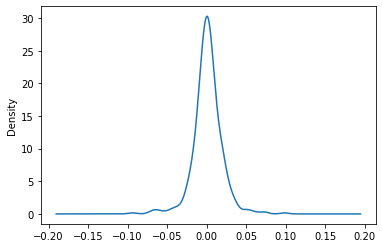

In [6]:
pct_returns_AGG['TCS.NS'].plot(kind='kde')

In [7]:
portfolio_agg_weights = []
portfolio_agg_returns = []
portfolio_agg_risk = []
portfolio_agg_sharpe_ratio = []

In [37]:
np.random.seed(1023)


for portfolio_agg in tqdm(range(numPortfolios)):

  # Randomized weights for the portfolio
  weights_agg = np.random.random_sample(len(stocks))
  weights_agg = weights_agg/np.sum(weights_agg)
  portfolio_agg_weights.append(weights_agg)
  print(weights_agg)

  # Annual portfolio returns according to above weights
  annual_return_agg = np.sum(pct_returns_AGG.mean() * weights_agg) * 252
  portfolio_agg_returns.append(annual_return_agg)

  # Portfolio Risk Calculation
  cov_matrix = pct_returns_AGG.cov() * 252
  portfolio_agg_variance = np.dot(weights_agg.T, np.dot(cov_matrix,weights_agg))
  portfolio_agg_std_dev = np.sqrt(portfolio_agg_variance)
  portfolio_agg_risk.append(portfolio_agg_std_dev)

  # Portfolio Sharpe Ratio Calculation
  sharpe_ratio_agg = (annual_return_agg - risk_free_return)/portfolio_agg_std_dev
  portfolio_agg_sharpe_ratio.append(sharpe_ratio_agg)


[0.43403711 0.29918316 0.24166197 0.02511776]
[0.01748887 0.32071974 0.29142584 0.37036555]
[0.06159871 0.28973979 0.27110274 0.37755877]
[0.05165346 0.35983343 0.07649309 0.51202002]
[0.13132795 0.25311233 0.34663479 0.26892492]
[0.18240526 0.42528934 0.29403633 0.09826907]
[0.2980666  0.18959334 0.26296028 0.24937978]
[0.12852439 0.14340987 0.36081954 0.3672462 ]
[0.0624387  0.27034901 0.49441201 0.17280028]
[0.30837747 0.37929071 0.22822255 0.08410927]
[0.21257923 0.45249883 0.16145148 0.17347045]
[0.22717838 0.17055448 0.5146979  0.08756924]
[0.14210155 0.0814852  0.75386177 0.02255148]
[0.36764466 0.34466815 0.05932944 0.22835775]
[0.36909852 0.32967017 0.0695068  0.2317245 ]
[0.07228587 0.04221717 0.22923184 0.65626512]
[0.21847156 0.44408821 0.31557108 0.02186916]
[0.41998095 0.18920041 0.03152655 0.3592921 ]
[0.22565684 0.20112181 0.15039856 0.42282278]
[0.21718417 0.28143706 0.32090574 0.18047303]
[0.11605245 0.44120305 0.32734443 0.11540007]
[0.39733549 0.12345815 0.17722048 

[0.23248953 0.28058514 0.42895551 0.05796981]
[0.0359895  0.17307914 0.30077058 0.49016078]
[0.10434732 0.1868002  0.45040285 0.25844963]
[0.30330107 0.19777806 0.42516982 0.07375104]
[0.17122202 0.33844386 0.19284934 0.29748478]
[0.19277423 0.07285981 0.34424122 0.39012475]
[0.2660847  0.1714223  0.23104658 0.33144642]
[0.02807167 0.02435391 0.45732347 0.49025095]
[0.04563619 0.19440615 0.40945776 0.3504999 ]
[0.20230791 0.25209367 0.23280093 0.31279749]
[0.15178626 0.38970816 0.29096905 0.16753652]
[0.09098009 0.2214523  0.34540521 0.3421624 ]
[0.07452776 0.16688742 0.41205257 0.34653224]
[0.34503657 0.39491434 0.18038253 0.07966656]
[0.28983085 0.13665366 0.316043   0.25747249]
[0.09228113 0.29794815 0.30285426 0.30691647]
[0.23968177 0.31624044 0.08370584 0.36037195]
[0.47137236 0.02163495 0.13098212 0.37601057]
[0.38746574 0.35209161 0.1629364  0.09750625]
[0.44383597 0.05353253 0.22421525 0.27841625]
[0.24287005 0.19507401 0.00827889 0.55377705]
[0.35124947 0.25088809 0.21791285 

[0.40110024 0.23520996 0.15538141 0.20830839]
[0.05797798 0.29068432 0.24026641 0.41107129]
[0.02459994 0.07686449 0.33361314 0.56492244]
[0.28434556 0.1944021  0.13654585 0.38470648]
[0.30688782 0.18870485 0.17000822 0.33439912]
[0.02310455 0.4566708  0.43401947 0.08620518]
[0.14675609 0.25643794 0.33482473 0.26198123]
[0.32007105 0.17389457 0.33897951 0.16705487]
[0.34374302 0.16776287 0.05322    0.43527411]
[0.03689448 0.39994114 0.46690615 0.09625824]
[0.3127489  0.16587088 0.11361815 0.40776207]
[0.16345233 0.35722974 0.17186389 0.30745404]
[0.29633634 0.15139773 0.27070851 0.28155742]
[0.64345693 0.08455373 0.08758554 0.1844038 ]
[0.14120012 0.08647979 0.34628685 0.42603324]
[0.60665973 0.05491108 0.04252602 0.29590317]
[0.18814885 0.08504591 0.45776504 0.26904021]
[0.56895757 0.24845451 0.06338242 0.1192055 ]
[0.37086808 0.1815569  0.42934048 0.01823454]
[0.21955938 0.05092269 0.30532066 0.42419727]
[0.023276   0.37560767 0.27837344 0.32274289]
[0.28947072 0.23830955 0.22509566 

[0.27336962 0.27742221 0.10875192 0.34045625]
[0.04436853 0.30224491 0.31365018 0.33973638]
[0.1664032  0.1770259  0.38607317 0.27049773]
[0.0772166  0.26353797 0.39344797 0.26579745]
[0.0127637  0.4010583  0.28999203 0.29618597]
[0.27377073 0.17923623 0.37384775 0.1731453 ]
[0.39980431 0.03005981 0.22912016 0.34101572]
[0.26861176 0.14294705 0.43762513 0.15081606]
[0.04424078 0.35681053 0.33527942 0.26366926]
[0.11990994 0.26128514 0.2885655  0.33023942]
[0.48712142 0.08275715 0.27372397 0.15639746]
[0.03470345 0.4887081  0.15245635 0.3241321 ]
[0.25077602 0.10007582 0.34879523 0.30035292]
[0.12496523 0.64482845 0.17133409 0.05887223]
[0.28799069 0.23395286 0.153823   0.32423346]
[0.27607554 0.39433631 0.00062903 0.32895912]
[0.27414959 0.14540022 0.23088183 0.34956836]
[0.47254819 0.06398726 0.40538741 0.05807715]
[0.5806666  0.16115935 0.04823365 0.2099404 ]
[0.20069574 0.26508967 0.25648737 0.27772722]
[0.31451157 0.5887537  0.090443   0.00629172]
[0.50305036 0.01701618 0.41798049 

[0.60130051 0.01471991 0.015561   0.36841858]
[0.34025696 0.26702623 0.01381161 0.37890519]
[0.15342474 0.39623664 0.04649612 0.40384249]
[0.30781839 0.37052595 0.24795016 0.07370549]
[0.43605814 0.22368107 0.24296112 0.09729967]
[0.33431032 0.31493252 0.30085887 0.04989829]
[0.11257629 0.1677971  0.46189662 0.25772999]
[0.21720818 0.31923364 0.1306332  0.33292498]
[0.2803856  0.00375218 0.48474586 0.23111636]
[0.25791462 0.25376129 0.14917268 0.33915141]
[0.10174926 0.42059281 0.46579523 0.0118627 ]
[0.12690349 0.27235153 0.41469221 0.18605277]
[0.10559023 0.40976831 0.05848386 0.4261576 ]
[0.12099519 0.38986896 0.23329359 0.25584226]
[0.19695943 0.21893277 0.24643127 0.33767654]
[0.32213335 0.19137136 0.29009676 0.19639852]
[0.33316004 0.03958214 0.37918754 0.24807028]
[0.0815015  0.25366308 0.33250504 0.33233039]
[0.02790873 0.50738532 0.42685978 0.03784616]
[0.01106468 0.36301721 0.45326129 0.17265682]
[0.28100578 0.11545906 0.09514764 0.50838753]
[0.28190568 0.31143389 0.27466899 

[0.33110341 0.28377689 0.37989634 0.00522336]
[0.07693913 0.65538503 0.25907988 0.00859595]
[0.41699048 0.02878772 0.09507725 0.45914455]
[0.61700008 0.00990282 0.16633115 0.20676595]
[0.36226137 0.0048478  0.2955124  0.33737844]
[0.37205386 0.09463747 0.16591856 0.36739011]
[0.23193992 0.29126079 0.35545088 0.12134841]
[0.25636064 0.28481322 0.009279   0.44954714]
[0.20654436 0.35108971 0.22271232 0.21965361]
[0.33365293 0.30152898 0.12048783 0.24433027]
[0.057276   0.30564122 0.42672107 0.21036172]
[0.31896453 0.06937541 0.40194743 0.20971263]
[0.3051472  0.27383847 0.04784468 0.37316965]
[0.38067769 0.22588729 0.25233771 0.14109731]
[0.14876094 0.57732384 0.08377347 0.19014175]
[0.10932496 0.05261188 0.5907353  0.24732786]
[0.07969114 0.16560797 0.57208153 0.18261936]
[0.01801686 0.35280429 0.28704704 0.34213181]
[0.29330504 0.04524358 0.31844353 0.34300785]
[0.3031258  0.35951114 0.2496547  0.08770835]
[0.42522048 0.13227936 0.15375584 0.28874431]
[0.22982723 0.25728574 0.09600929 

[0.34202155 0.35310066 0.10880072 0.19607706]
[0.04143416 0.30158732 0.32223576 0.33474277]
[0.28599839 0.299881   0.32114076 0.09297985]
[0.63137739 0.07318312 0.14724217 0.14819732]
[0.57101476 0.07380405 0.05054135 0.30463985]
[0.27921881 0.20241629 0.20001018 0.31835473]
[0.26976249 0.33634885 0.0636028  0.33028586]
[0.28210464 0.49073248 0.1494123  0.07775058]
[0.14601813 0.31923481 0.24687311 0.28787395]
[0.0033029  0.51467588 0.34179376 0.14022746]
[0.37283348 0.2925542  0.18169239 0.15291994]
[0.16426001 0.30632427 0.23900601 0.29040971]
[0.1292576  0.30761515 0.08570434 0.47742292]
[0.03914743 0.25863922 0.35873084 0.3434825 ]
[0.18126974 0.56482693 0.21622976 0.03767357]
[0.25950317 0.23868192 0.01072506 0.49108985]
[0.19705719 0.33305647 0.28270101 0.18718534]
[0.21027666 0.32937684 0.33417277 0.12617373]
[0.37118521 0.08783988 0.37722724 0.16374767]
[0.34225564 0.29169293 0.09086617 0.27518526]
[0.30271173 0.15824725 0.27088344 0.26815757]
[0.17971842 0.2954814  0.2892535  

[0.07943659 0.51450104 0.06433047 0.3417319 ]
[0.22752125 0.31221765 0.18357394 0.27668716]
[0.08045168 0.188757   0.31123077 0.41956055]
[0.21651014 0.33854779 0.18353951 0.26140256]
[0.23654194 0.12927324 0.46607314 0.16811168]
[0.24682097 0.21134874 0.37654903 0.16528126]
[0.1588512  0.24052111 0.30646738 0.29416031]
[0.15846847 0.49673656 0.06122091 0.28357406]
[0.33245365 0.37346368 0.19187062 0.10221205]
[0.31771978 0.18421458 0.32175844 0.17630719]
[0.45381181 0.23281548 0.25591476 0.05745794]
[0.39332255 0.49736993 0.01596475 0.09334278]
[0.09928814 0.29043715 0.38217453 0.22810018]
[0.27216591 0.17127777 0.23577367 0.32078264]
[0.33725322 0.37333825 0.17387694 0.11553159]
[0.32925885 0.3538366  0.15890202 0.15800253]
[0.32718956 0.10308199 0.35530237 0.21442608]
[0.18307435 0.04756721 0.32398498 0.44537346]
[0.33340865 0.17245143 0.15303741 0.34110251]
[0.02380904 0.40325495 0.37019797 0.20273805]
[0.22327789 0.18900452 0.3744754  0.2132422 ]
[0.09130088 0.34636165 0.35942336 

[0.33688009 0.15445316 0.34606417 0.16260258]
[0.3767019  0.02047887 0.18623214 0.41658709]
[0.33880221 0.14288446 0.00883958 0.50947375]
[0.4410853  0.10530367 0.39097378 0.06263726]
[0.05180441 0.04096591 0.45874959 0.44848008]
[0.12648029 0.13532616 0.34335387 0.39483968]
[0.058092   0.03489013 0.56439725 0.34262062]
[0.15528079 0.29984213 0.22421318 0.3206639 ]
[0.37939367 0.35211474 0.23747402 0.03101757]
[0.56444928 0.26576443 0.13657119 0.0332151 ]
[0.22492237 0.23173391 0.14393051 0.39941322]
[0.21894201 0.36000616 0.28397172 0.1370801 ]
[0.42849597 0.16366383 0.19778862 0.21005159]
[0.38207717 0.05144002 0.01045402 0.55602879]
[0.30601273 0.11052499 0.08088027 0.50258202]
[0.37158741 0.14077944 0.25690018 0.23073297]
[0.06235118 0.03095519 0.63495196 0.27174167]
[0.31784198 0.39853859 0.01159127 0.27202817]
[0.35126896 0.02144911 0.33431126 0.29297067]
[0.25058601 0.23270235 0.23805554 0.27865611]
[0.20263078 0.21809071 0.25621458 0.32306392]
[0.23425584 0.52626303 0.07768538 

[0.08890523 0.48030498 0.07588249 0.3549073 ]
[0.28344904 0.43898978 0.26894512 0.00861605]
[0.26781474 0.03390178 0.40818966 0.29009382]
[0.29993129 0.15696525 0.37348363 0.16961983]
[0.27294912 0.22003746 0.27407515 0.23293828]
[0.05538314 0.67655962 0.13279165 0.13526559]
[0.14504512 0.31956756 0.4358049  0.09958243]
[0.36513157 0.20872804 0.24325493 0.18288546]
[0.09516245 0.5749303  0.26386044 0.06604682]
[0.4669076  0.0138071  0.06663623 0.45264907]
[0.04592292 0.3608431  0.34968845 0.24354553]
[0.09228867 0.29390874 0.31191882 0.30188377]
[0.42347183 0.23537341 0.10981299 0.23134177]
[0.02025198 0.28940869 0.46081106 0.22952827]
[0.10581809 0.11595827 0.41708152 0.36114212]
[0.03141724 0.479827   0.08503136 0.4037244 ]
[0.17309162 0.4787705  0.12580792 0.22232996]
[0.46556739 0.49416802 0.02456041 0.01570418]
[0.10660294 0.28339284 0.26707677 0.34292745]
[0.13661887 0.40957523 0.10464619 0.34915971]
[0.07628144 0.2666612  0.34921136 0.307846  ]
[4.46769219e-01 5.24629212e-01 2.8

[0.06183928 0.37673525 0.45587191 0.10555355]
[0.04581795 0.36144    0.21455184 0.37819021]
[0.18218608 0.22332433 0.18280004 0.41168956]
[0.11660945 0.27088861 0.34356809 0.26893386]
[0.20513648 0.23153981 0.37516246 0.18816125]
[0.23271438 0.07550791 0.42195252 0.26982519]
[0.14275038 0.34707144 0.31823298 0.1919452 ]
[0.41475519 0.11246546 0.17002398 0.30275538]
[0.07421647 0.60659993 0.10962672 0.20955688]
[0.01822755 0.27698133 0.41843258 0.28635855]
[0.02862654 0.3141067  0.46502801 0.19223876]
[0.2439581  0.2116039  0.49774692 0.04669108]
[0.02488956 0.23895494 0.30176041 0.4343951 ]
[0.44452168 0.10646322 0.12639468 0.32262041]
[0.06999802 0.07086995 0.17077739 0.68835464]
[0.28108037 0.15625318 0.24067493 0.32199152]
[0.18689224 0.0856347  0.45945877 0.2680143 ]
[0.3584366  0.07309268 0.23485222 0.3336185 ]
[0.40192835 0.17329397 0.35269411 0.07208358]
[0.25845467 0.39662406 0.01328251 0.33163876]
[0.46971091 0.46709825 0.0229115  0.04027934]
[0.23773029 0.17898172 0.11918119 

[0.27284949 0.48508337 0.13614527 0.10592187]
[0.3073201  0.00360536 0.05241585 0.63665869]
[0.30347577 0.06672204 0.2654123  0.36438988]
[0.19849165 0.34675936 0.23025229 0.2244967 ]
[0.36595038 0.20836844 0.36821026 0.05747092]
[0.17594426 0.00792977 0.37483396 0.44129201]
[0.30615183 0.29743442 0.32542471 0.07098904]
[0.2526408  0.34987253 0.12628984 0.27119682]
[0.5021494  0.05065707 0.23691983 0.21027371]
[0.57827211 0.03280757 0.04878776 0.34013256]
[0.03648408 0.09818397 0.61158107 0.25375089]
[0.25845825 0.0884673  0.33204321 0.32103123]
[0.28583774 0.06057471 0.39369424 0.25989331]
[0.11622886 0.58797225 0.0478297  0.24796919]
[0.33985098 0.25221133 0.25280354 0.15513415]
[0.19155404 0.35846164 0.26329068 0.18669364]
[0.31620984 0.26776886 0.34567362 0.07034769]
[0.24336501 0.26873197 0.39655881 0.09134421]
[0.22514464 0.17097792 0.3761982  0.22767924]
[0.30274231 0.14750207 0.21069264 0.33906298]
[0.37351379 0.03719427 0.39117289 0.19811905]
[0.21030897 0.41005928 0.18946713 

[0.2532696  0.26153249 0.12296391 0.36223399]
[0.31232797 0.35796731 0.04083357 0.28887116]
[0.06271857 0.24598363 0.47511701 0.21618079]
[0.19810701 0.11525479 0.37090011 0.3157381 ]
[0.32861018 0.55253009 0.02554852 0.09331121]
[0.29017808 0.30917533 0.07935678 0.3212898 ]
[0.32533458 0.15718874 0.45469935 0.06277733]
[0.00279668 0.52239428 0.37694827 0.09786077]
[0.27526436 0.30375016 0.21539396 0.20559152]
[0.23625739 0.33661251 0.27437416 0.15275594]
[0.23385634 0.06988597 0.41714928 0.27910841]
[0.11279033 0.15096756 0.27493532 0.46130679]
[0.20718515 0.44010716 0.05538775 0.29731994]
[0.03204481 0.31715906 0.5184345  0.13236163]
[0.1028495  0.33970487 0.20295312 0.3544925 ]
[0.55420748 0.33919832 0.05977109 0.04682311]
[0.52296856 0.01518988 0.28417717 0.17766439]
[0.19524861 0.22545559 0.23925922 0.34003658]
[0.31649429 0.12762657 0.28981153 0.26606761]
[0.09691478 0.51440136 0.23430699 0.15437687]
[0.37803198 0.26054159 0.26555529 0.09587113]
[0.37390672 0.25087798 0.20964362 

[0.23817404 0.17516476 0.25618761 0.33047358]
[0.18528648 0.34148044 0.35694341 0.11628966]
[0.22412504 0.31949016 0.17105658 0.28532822]
[0.44376828 0.37811121 0.00800493 0.17011557]
[0.12818249 0.13302895 0.21861576 0.5201728 ]
[0.35832114 0.24108567 0.23716082 0.16343237]
[0.2006803  0.05255512 0.02278724 0.72397734]
[0.14331204 0.31314062 0.36310874 0.1804386 ]
[0.1212612  0.23656085 0.3299143  0.31226364]
[0.32810201 0.2719144  0.34351386 0.05646972]
[0.17112303 0.30471431 0.31671663 0.20744604]
[0.18690167 0.3116443  0.33110791 0.17034612]
[0.07865384 0.72689241 0.0072803  0.18717344]
[0.29624973 0.23460722 0.157238   0.31190505]
[0.13857273 0.32713249 0.36237778 0.171917  ]
[0.17240938 0.22984144 0.31602268 0.2817265 ]
[0.39492592 0.15799396 0.40288401 0.04419611]
[0.07231391 0.34591055 0.37728462 0.20449093]
[0.38611851 0.54505337 0.01511794 0.05371019]
[0.08952522 0.00800711 0.37986857 0.5225991 ]
[0.1634586  0.18201516 0.58524877 0.06927747]
[0.32378782 0.1375672  0.2020977  

[0.17553168 0.1966798  0.37342433 0.25436419]
[0.43356957 0.33438983 0.19625072 0.03578988]
[0.4324736  0.16091739 0.1817441  0.22486492]
[0.24646481 0.29822133 0.21519859 0.24011528]
[0.27550086 0.26993268 0.30628223 0.14828423]
[0.10628533 0.36646074 0.16934992 0.35790401]
[0.18850226 0.27437705 0.22524554 0.31187515]
[0.40843954 0.05858997 0.09949514 0.43347534]
[0.25128418 0.12902485 0.26699197 0.352699  ]
[0.54710993 0.05302232 0.16378437 0.23608338]
[0.16164516 0.48852849 0.21001395 0.1398124 ]
[0.14119773 0.01784974 0.3943095  0.44664303]
[0.3000781  0.06045218 0.33770996 0.30175976]
[0.26269867 0.03492274 0.46336834 0.23901024]
[0.24271593 0.53204046 0.16940206 0.05584155]
[0.20295886 0.16794868 0.34445268 0.28463978]
[0.27133794 0.04201821 0.05506754 0.6315763 ]
[0.25111325 0.13952953 0.47995651 0.12940071]
[0.30322803 0.20244004 0.30638993 0.18794199]
[0.11250577 0.34897525 0.29366861 0.24485037]
[0.16602806 0.28365052 0.29305911 0.2572623 ]
[0.2781355  0.0406468  0.32416668 

[0.06634625 0.39901891 0.06689171 0.46774313]
[0.42810297 0.11010318 0.27139986 0.19039399]
[0.30225499 0.59445603 0.06608778 0.0372012 ]
[0.18175779 0.36062386 0.25987127 0.19774708]
[0.26512668 0.01392103 0.30800733 0.41294496]
[0.2637299  0.18341883 0.41040206 0.14244921]
[0.49543337 0.04031674 0.14578174 0.31846815]
[0.3728144  0.20374093 0.41588655 0.00755812]
[0.02615862 0.24861179 0.32708234 0.39814726]
[0.31070612 0.08938177 0.07946997 0.52044215]
[0.33010303 0.30267464 0.05786708 0.30935526]
[0.40781381 0.04601654 0.17204597 0.37412368]
[0.14251952 0.50217728 0.26665855 0.08864466]
[0.21642534 0.15768924 0.26216655 0.36371888]
[0.05816406 0.58425363 0.33362444 0.02395787]
[0.27900317 0.24108646 0.23697769 0.24293267]
[0.26061879 0.32348703 0.20449042 0.21140375]
[0.03255524 0.43960406 0.45078653 0.07705418]
[0.4345126  0.08131785 0.30600022 0.17816933]
[0.14484352 0.23781353 0.26810963 0.34923332]
[0.03061047 0.05981637 0.20036775 0.70920541]
[0.41712188 0.0653058  0.39961479 

[0.34058994 0.29971834 0.11328255 0.24640917]
[0.24390995 0.01296625 0.53709593 0.20602786]
[0.04437971 0.6076469  0.16013079 0.1878426 ]
[0.48556371 0.1448185  0.14395939 0.22565841]
[0.1387059  0.4534426  0.24055425 0.16729725]
[0.58103215 0.22787777 0.15453222 0.03655786]
[0.36892319 0.00510286 0.32038001 0.30559395]
[0.1657492  0.31282375 0.17666611 0.34476093]
[0.10153292 0.19114199 0.62178508 0.08554001]
[0.14559779 0.03453757 0.24913449 0.57073015]
[0.26231724 0.29718697 0.21167139 0.2288244 ]
[0.28792852 0.36886012 0.2962054  0.04700596]
[0.12420458 0.47076368 0.39307995 0.01195179]
[0.14356838 0.20537462 0.36517378 0.28588322]
[0.29422632 0.30552428 0.20698458 0.19326482]
[0.07098401 0.32078409 0.36519821 0.2430337 ]
[0.3192123  0.01173205 0.3415115  0.32754415]
[0.15252908 0.19353883 0.63180177 0.02213031]
[0.2608763  0.36405384 0.36505684 0.01001302]
[0.33402025 0.33664817 0.21856926 0.11076232]
[0.07533765 0.2956949  0.26364084 0.3653266 ]
[0.33533991 0.09258748 0.25580793 

[0.05395317 0.14054383 0.30929297 0.49621003]
[0.20984473 0.49662119 0.28181338 0.0117207 ]
[0.05685112 0.42102198 0.23980585 0.28232105]
[0.3958732  0.07913575 0.30180711 0.22318395]
[0.27455207 0.15789736 0.22275782 0.34479274]
[0.00904836 0.3150185  0.44436719 0.23156595]
[0.49478194 0.04480492 0.38972106 0.07069208]
[0.29358676 0.31766105 0.08034884 0.30840335]
[0.1496312  0.07875262 0.23148692 0.54012927]
[0.14339839 0.21131079 0.30912797 0.33616285]
[0.31905118 0.21757223 0.25211387 0.21126272]
[0.16836288 0.47101233 0.34845908 0.01216571]
[0.42750191 0.04705716 0.09515137 0.43028957]
[0.16661259 0.22696289 0.1902239  0.41620062]
[0.38024047 0.07705545 0.29172277 0.25098131]
[0.11058802 0.46111291 0.42095402 0.00734505]
[0.18462966 0.06211996 0.06068886 0.69256152]
[0.16448285 0.27386326 0.1911845  0.37046939]
[0.28563286 0.01169827 0.39310537 0.30956351]
[0.37722936 0.23252329 0.07582923 0.31441812]
[0.14388963 0.35340767 0.42342173 0.07928097]
[0.53652242 0.11562594 0.26594157 

[0.30393413 0.40838327 0.03972099 0.24796161]
[0.24075216 0.07415337 0.40026088 0.28483359]
[0.09930655 0.51545466 0.0618484  0.32339038]
[0.43978097 0.33080853 0.16777684 0.06163366]
[0.00174508 0.23028438 0.47878139 0.28918915]
[0.53082331 0.15541015 0.30739218 0.00637436]
[0.37946476 0.42312161 0.03774125 0.15967238]
[0.16376855 0.05101812 0.33856    0.44665334]
[0.3122841  0.28367949 0.12103911 0.2829973 ]
[0.18054276 0.36010518 0.1429536  0.31639847]
[0.11977355 0.3268234  0.03585984 0.51754322]
[0.13482334 0.36941601 0.28801538 0.20774527]
[0.03382302 0.47355728 0.03625551 0.45636418]
[0.30874043 0.39948752 0.01616867 0.27560338]
[0.04308634 0.30743665 0.14426867 0.50520834]
[0.29970108 0.22532331 0.16576859 0.30920702]
[0.01523451 0.29775317 0.20629024 0.48072208]
[0.42403797 0.03228189 0.152344   0.39133614]
[0.31521181 0.1496072  0.22395266 0.31122833]
[0.21606721 0.16816391 0.27701898 0.3387499 ]
[0.34092245 0.36120261 0.26454312 0.03333182]
[0.4473269  0.49453601 0.05312198 

[0.51775422 0.03336356 0.06096906 0.38791315]
[0.23406292 0.15239437 0.47993228 0.13361042]
[0.42717435 0.32703646 0.17020296 0.07558624]
[0.35642427 0.28862554 0.35120095 0.00374923]
[0.1933555  0.29259733 0.2789825  0.23506467]
[0.25328184 0.00955118 0.27894922 0.45821776]
[0.32606886 0.3195608  0.29961354 0.05475679]
[0.29005123 0.17128421 0.15033283 0.38833173]
[0.26304639 0.36241803 0.16041206 0.21412351]
[0.12554699 0.16487205 0.33219385 0.37738711]
[0.41663166 0.08207757 0.13606544 0.36522533]
[0.25789331 0.13522964 0.35028153 0.25659551]
[0.04344141 0.11282189 0.421957   0.4217797 ]
[0.24868843 0.2610309  0.14461221 0.34566845]
[0.28404802 0.02069074 0.43048298 0.26477826]
[0.00490589 0.39644995 0.30173377 0.29691039]
[0.0136951  0.32654983 0.1725445  0.48721057]
[0.31033505 0.0575151  0.48974579 0.14240405]
[0.12553832 0.56007887 0.00192486 0.31245795]
[0.18395648 0.32937674 0.05808206 0.42858473]
[0.31265221 0.39786657 0.12115039 0.16833082]
[0.09796577 0.13664327 0.70576016 

[0.29246641 0.23307461 0.33450827 0.13995071]
[0.08097141 0.07555167 0.4969053  0.34657162]
[0.22684473 0.22258977 0.28590776 0.26465774]
[0.25068557 0.43476275 0.15108768 0.16346401]
[0.10853479 0.24860802 0.58734166 0.05551553]
[0.53124748 0.10093923 0.07025291 0.29756038]
[0.18639404 0.3454169  0.26671321 0.20147585]
[0.10402673 0.43949265 0.22285291 0.23362771]
[0.35683682 0.2947499  0.02530773 0.32310556]
[0.29153417 0.24563036 0.09603937 0.36679609]
[0.32831711 0.20712315 0.17585684 0.28870291]
[0.08364059 0.1940195  0.37519863 0.34714128]
[0.12558355 0.37054059 0.43635801 0.06751785]
[0.29800351 0.02492736 0.05174724 0.62532189]
[0.05853778 0.35223043 0.21040245 0.37882934]
[0.28563101 0.13815258 0.30342627 0.27279014]
[0.30460362 0.27452729 0.26425618 0.15661291]
[0.43478592 0.39641963 0.12630812 0.04248633]
[0.25744463 0.13307805 0.18465142 0.42482589]
[0.3332523  0.34177194 0.06801863 0.25695713]
[0.11773844 0.52443652 0.31288762 0.04493742]
[0.40716739 0.4187086  0.04294086 

[0.27177733 0.05760297 0.17233013 0.49828957]
[0.08664519 0.35734256 0.22263603 0.33337622]
[0.05153224 0.08694756 0.43198119 0.42953901]
[0.16543457 0.25830394 0.22920185 0.34705963]
[0.275708   0.34961668 0.24436435 0.13031098]
[0.53874065 0.08614577 0.29019009 0.08492349]
[0.0590112  0.3786168  0.20414752 0.35822448]
[0.11706213 0.26652568 0.38768287 0.22872932]
[0.1650141  0.38797475 0.19319943 0.25381172]
[0.26138374 0.24691012 0.18709818 0.30460797]
[0.00951189 0.47239772 0.45569076 0.06239963]
[0.2005041  0.19333837 0.0401261  0.56603144]
[0.24931828 0.34626928 0.12073378 0.28367867]
[0.27062891 0.26307437 0.19370036 0.27259636]
[0.26351217 0.27397293 0.17557577 0.28693912]
[0.18628888 0.2830165  0.27072181 0.25997281]
[0.49807056 0.17433818 0.04501574 0.28257553]
[0.74380378 0.06241816 0.12611458 0.06766349]
[0.32244237 0.24612514 0.33873016 0.09270233]
[0.1817082  0.01006881 0.30541177 0.50281122]
[0.25731416 0.07360177 0.36404129 0.30504278]
[0.05632897 0.29185231 0.41446083 

[0.23226492 0.30597989 0.23448732 0.22726787]
[0.12600914 0.15320439 0.21837823 0.50240823]
[0.07143121 0.22276538 0.38255061 0.3232528 ]
[0.23934074 0.4381445  0.25229379 0.07022097]
[0.17926096 0.00980057 0.31575143 0.49518704]
[0.08190107 0.52604326 0.21587233 0.17618334]
[0.24699254 0.14661072 0.28896402 0.31743272]
[0.2114625  0.09036422 0.41592814 0.28224513]
[0.02250906 0.35332773 0.33567355 0.28848966]
[0.01473269 0.37623587 0.28437282 0.32465863]
[0.03607528 0.20252578 0.24256818 0.51883077]
[0.01346665 0.51765868 0.12942974 0.33944493]
[0.07430322 0.61837758 0.16583302 0.14148618]
[0.41481989 0.23003232 0.1331173  0.22203048]
[0.20423976 0.29739591 0.4528305  0.04553383]
[0.4263094  0.03681622 0.26355792 0.27331647]
[0.32925226 0.16413954 0.09506107 0.41154713]
[0.26174393 0.40611095 0.0261172  0.30602793]
[0.05377286 0.15175988 0.34319885 0.45126842]
[0.40018831 0.12430775 0.21603308 0.25947086]
[0.21661536 0.42318015 0.00444011 0.35576438]
[0.2588569  0.2276785  0.31311264 

[0.50981511 0.30087534 0.06063161 0.12867794]
[0.28607233 0.17932871 0.22656697 0.308032  ]
[0.35778874 0.05875255 0.33347597 0.24998273]
[0.28075261 0.26409771 0.1137913  0.34135839]
[0.13465527 0.32677794 0.34875365 0.18981314]
[0.49685289 0.19833984 0.07258137 0.2322259 ]
[0.16306867 0.11715798 0.34387972 0.37589364]
[0.06835722 0.16508186 0.48322762 0.2833333 ]
[0.53669652 0.39811278 0.01132694 0.05386376]
[0.30052851 0.00579916 0.25000474 0.44366759]
[0.15776679 0.18011292 0.4102793  0.25184099]
[0.34842121 0.21440384 0.12143515 0.31573979]
[0.05533497 0.16805377 0.28646998 0.49014128]
[0.10321291 0.28125917 0.34278257 0.27274535]
[0.02143713 0.05596141 0.49939402 0.42320743]
[0.03944666 0.38386476 0.3188561  0.25783248]
[0.3441132  0.27696054 0.27474588 0.10418037]
[0.14180489 0.1778844  0.37356939 0.30674132]
[0.20453947 0.34633252 0.08137694 0.36775106]
[0.39812204 0.40098459 0.16663277 0.03426061]
[0.44448124 0.24672275 0.09817453 0.21062148]
[0.17697196 0.01693893 0.45289628 

In [38]:
metrics_agg = [portfolio_agg_returns,portfolio_agg_risk,portfolio_agg_sharpe_ratio,portfolio_agg_weights]
portfolio_agg_df = pd.DataFrame(metrics_agg).T

portfolio_agg_df.columns = ['Return','Risk','Sharpe Ratio','Associated Weights']
portfolio_agg_df

,Return,Risk,Sharpe Ratio,Associated Weights
0,0.278731,0.274314,0.791543,"[0.13483791771115924, 0.25193191249459745, 0.3..."
1,0.325512,0.297071,0.888381,"[0.13483791771115924, 0.25193191249459745, 0.3..."
2,0.329298,0.304721,0.8785,"[0.3519217400517323, 0.08331147314967878, 0.31..."
3,0.267808,0.274101,0.752307,"[0.3813364387179142, 0.07004691223963264, 0.33..."
4,0.293799,0.293482,0.791188,"[0.12414578815955801, 0.3050522056661175, 0.32..."
...,...,...,...,...
19996,0.292543,0.283532,0.814521,"[0.04280145978760472, 0.4100020945565706, 0.48..."
19997,0.32628,0.28826,0.918199,"[0.3298238304379148, 0.27004088362555845, 0.06..."
19998,0.291358,0.297328,0.772742,"[0.3764036822865796, 0.10844524719576079, 0.13..."
19999,0.261307,0.273381,0.730508,"[0.360563901847529, 0.27039099267017797, 0.166..."


In [39]:
min_risk_portfolio = portfolio_agg_df.iloc[portfolio_agg_df.Risk.astype('float64').argmin()].to_frame().T
min_risk_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
2746,0.265839,0.252228,0.809738,"[0.08249115584323496, 0.4413551721944044, 0.36..."


In [40]:
print('For a minimal Risk Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks,min_risk_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a minimal Risk Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

RELIANCE.NS  -------------  8.249115584323496

HDFCBANK.NS  -------------  44.13551721944044

TCS.NS  -------------  36.62805416001569

BAJAJFINSV.NS  -------------  10.987313036220387


In [41]:
max_return_portfolio = portfolio_agg_df.iloc[portfolio_agg_df.Return.astype('float64').argmax()].to_frame().T
max_return_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
2425,0.37269,0.408683,0.761202,"[0.2170814806547073, 0.09441356360814468, 0.32..."


In [42]:
print('For a maximal Return Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks,max_return_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Return Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

RELIANCE.NS  -------------  21.70814806547073

HDFCBANK.NS  -------------  9.441356360814467

TCS.NS  -------------  32.103668583576024

BAJAJFINSV.NS  -------------  36.74682699013877


In [35]:
max_sharpeRatio_portfolio = portfolio_agg_df.iloc[portfolio_agg_df['Sharpe Ratio'].astype('float64').argmax()].to_frame().T
max_sharpeRatio_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
12646,0.340837,0.271137,1.02987,"[0.08190359690039077, 0.45379462702790746, 0.4..."


In [36]:
print('For a maximal Sharpe Ratio Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks,max_sharpeRatio_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Sharpe Ratio Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

RELIANCE.NS  -------------  8.190359690039077

HDFCBANK.NS  -------------  45.37946270279075

TCS.NS  -------------  43.57623152102397

BAJAJFINSV.NS  -------------  2.8539460861462107


# rising giant

In [118]:
stocks1 = ['LAURUSLABS.NS','SONATSOFTW.NS','FINPIPE.NS','SUPRAJIT.NS']

In [119]:
pct_returns_RS = yf.download(stocks1,start = start, end = end)['Adj Close'].pct_change()
pct_returns_RS

[*********************100%***********************]  4 of 4 completed


,FINPIPE.NS,LAURUSLABS.NS,SONATSOFTW.NS,SUPRAJIT.NS
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.015194,0.014664,0.003197,-0.018854
2020-01-03,0.001551,0.016593,-0.003027,0.012811
2020-01-06,-0.011207,0.003027,-0.005913,-0.013622
2020-01-07,-0.001751,0.012336,0.004019,-0.004932
...,...,...,...,...
2021-12-24,-0.006311,-0.006830,0.028243,0.007330
2021-12-27,-0.007572,0.035084,0.025565,0.016978
2021-12-28,0.005907,0.018777,-0.005623,0.023492


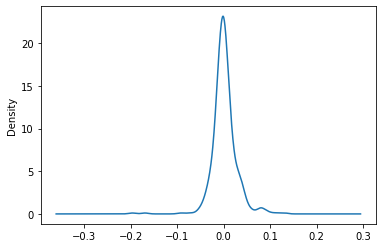

In [120]:
pct_returns_RS['FINPIPE.NS'].plot(kind='kde')

In [121]:
portfolio_RS_weights = []
portfolio_RS_returns = []
portfolio_RS_risk = []
portfolio_RS_sharpe_ratio = []

In [122]:
np.random.seed(0)


for portfolio_RS in tqdm(range(numPortfolios)):

  # Randomized weights for the portfolio
  weights_RS = np.random.random_sample(len(stocks1))
  weights_RS = weights_RS/np.sum(weights_RS)
  portfolio_RS_weights.append(weights_RS)
  print(weights_RS)

  # Annual portfolio returns according to above weights
  annual_return_RS = np.sum(pct_returns_RS.mean() * weights_RS) * 252
  portfolio_RS_returns.append(annual_return_RS)

  # Portfolio Risk Calculation
  cov_matrix = pct_returns_RS.cov() * 252
  portfolio_RS_variance = np.dot(weights_RS.T, np.dot(cov_matrix,weights_RS))
  portfolio_RS_std_dev = np.sqrt(portfolio_RS_variance)
  portfolio_RS_risk.append(portfolio_RS_std_dev)

  # Portfolio Sharpe Ratio Calculation
  sharpe_ratio_RS = (annual_return_RS - risk_free_return)/portfolio_RS_std_dev
  portfolio_RS_sharpe_ratio.append(sharpe_ratio_RS)


[0.2275677  0.29655611 0.24993822 0.22593797]
[0.1766031  0.26924493 0.18241092 0.37174105]
[0.36123028 0.14373357 0.29677919 0.19825697]
[0.34389291 0.56035414 0.04300507 0.05274788]
[0.0080841  0.33291382 0.31113736 0.34786472]
[0.32406883 0.26464084 0.15281859 0.25847173]
[0.0640631  0.34661191 0.07764701 0.51167798]
[0.26418693 0.20992357 0.13393189 0.39195761]
[0.27462234 0.34222196 0.01131228 0.37184343]
[0.21442448 0.21611939 0.33060629 0.23884984]
[0.23128455 0.2811586  0.4488116  0.03874524]
[0.39766289 0.39997167 0.12547318 0.07689227]
[0.18687207 0.21547646 0.33780682 0.25984466]
[0.67668801 0.06986476 0.14300702 0.11044021]
[0.40386721 0.15662972 0.28835589 0.15114718]
[0.14942755 0.10374995 0.61693388 0.12988862]
[0.1325213  0.24856725 0.55345295 0.0654585 ]
[0.35220289 0.04039184 0.41042298 0.19698229]
[0.41387165 0.25628418 0.31323958 0.01660459]
[0.34578413 0.14696266 0.36208649 0.14516673]
[0.21357411 0.27824066 0.04308481 0.46510043]
[0.39098086 0.18313086 0.36106504 

[0.19395338 0.58770088 0.07556455 0.14278119]
[0.09850033 0.21689058 0.40105106 0.28355803]
[0.49906612 0.00055872 0.43533708 0.06503809]
[0.09404572 0.42106263 0.09727233 0.38761932]
[0.47694366 0.09453782 0.35981176 0.06870675]
[0.2739848  0.23994754 0.30562226 0.18044541]
[0.46389048 0.02502288 0.14851208 0.36257457]
[0.27586852 0.11411333 0.07073767 0.53928048]
[0.18937521 0.35313354 0.29349856 0.16399268]
[0.14848452 0.20498542 0.3534344  0.29309566]
[0.00221226 0.29801468 0.39476138 0.30501168]
[0.15261287 0.4168852  0.12097927 0.30952266]
[0.37742991 0.37186715 0.11391436 0.13678859]
[0.30496636 0.48939765 0.07509741 0.13053858]
[0.35656428 0.20077824 0.36693367 0.07572381]
[0.32832992 0.20110832 0.19511268 0.27544909]
[0.1776991  0.14662555 0.37542818 0.30024718]
[0.30641953 0.12210227 0.24331274 0.32816546]
[0.30057582 0.13016438 0.29123745 0.27802236]
[0.07312302 0.44747452 0.22805144 0.25135102]
[0.20995352 0.26589978 0.29086895 0.23327775]
[0.3748043  0.27143608 0.17357973 

[0.02608908 0.15292123 0.40153875 0.41945094]
[0.33961528 0.36510836 0.02250857 0.27276778]
[0.46169732 0.28713246 0.05791336 0.19325686]
[0.16994703 0.20657656 0.28053282 0.34294359]
[0.44917049 0.46518103 0.0278464  0.05780207]
[0.10759743 0.30892847 0.26221593 0.32125816]
[0.23126669 0.25762845 0.21664929 0.29445557]
[0.42639433 0.27833317 0.27901653 0.01625597]
[0.37099743 0.04888639 0.2750722  0.30504398]
[0.26322005 0.138895   0.06968306 0.52820189]
[0.20313279 0.32028797 0.41079832 0.06578092]
[0.35638846 0.15959916 0.11836061 0.36565177]
[0.50727793 0.10184572 0.33634384 0.05453251]
[0.25228649 0.32065672 0.26530346 0.16175334]
[0.17044353 0.17491793 0.26238943 0.39224911]
[0.72785587 0.04193657 0.14228796 0.0879196 ]
[0.11535925 0.20681455 0.3022382  0.37558801]
[0.22360959 0.2718563  0.30208565 0.20244846]
[0.30120294 0.27721484 0.10957351 0.31200871]
[5.48976877e-02 4.71581916e-04 3.51407523e-01 5.93223207e-01]
[0.28820527 0.04594679 0.30384765 0.36200029]
[0.11786628 0.2640

[0.24881417 0.13008141 0.45339843 0.167706  ]
[0.35888164 0.37835239 0.17460855 0.08815742]
[0.16938303 0.45085027 0.1587459  0.2210208 ]
[0.20971799 0.25202096 0.4365038  0.10175725]
[0.32778051 0.24381671 0.3349123  0.09349049]
[0.18757683 0.46286378 0.15566152 0.19389787]
[0.31834942 0.24551125 0.17417467 0.26196466]
[0.13110853 0.49438888 0.12584681 0.24865578]
[0.07741241 0.19742333 0.20824834 0.51691591]
[0.11174951 0.19988091 0.34328822 0.34508136]
[0.43640838 0.16740749 0.28788129 0.10830284]
[0.09971303 0.23067495 0.39091007 0.27870195]
[0.3825841  0.35851867 0.01363705 0.24526018]
[0.28665376 0.4524896  0.01093449 0.24992215]
[0.12652251 0.03315519 0.36297505 0.47734724]
[0.61663167 0.02410327 0.32384466 0.0354204 ]
[0.24907897 0.19384599 0.21625948 0.34081556]
[0.11157967 0.38703639 0.14174086 0.35964307]
[0.12325022 0.51994643 0.04176304 0.31504031]
[0.00305899 0.44981303 0.52763899 0.019489  ]
[0.31385169 0.26008063 0.12060797 0.30545971]
[0.2030268  0.28049241 0.06627678 

[0.34665141 0.43540471 0.21698092 0.00096295]
[0.12127274 0.34603152 0.38329809 0.14939765]
[0.13232029 0.41610352 0.15801211 0.29356408]
[0.15549444 0.05431797 0.27804814 0.51213945]
[0.27154112 0.09166065 0.29954006 0.33725816]
[0.18624223 0.32469205 0.39596037 0.09310536]
[0.37301874 0.17459317 0.37904037 0.07334772]
[0.53891345 0.18475745 0.01134122 0.26498789]
[0.1710958  0.18295381 0.37619562 0.26975478]
[0.18413798 0.41876257 0.26033883 0.13676062]
[0.23318153 0.16720128 0.29722088 0.30239632]
[0.20160829 0.30862146 0.14586109 0.34390916]
[0.43395977 0.36409636 0.16023343 0.04171045]
[0.49170413 0.19816284 0.1492286  0.16090444]
[0.17949699 0.35053237 0.36147641 0.10849423]
[0.33591609 0.48915893 0.007825   0.16709998]
[0.62944521 0.01979348 0.06790067 0.28286064]
[0.45381884 0.16682202 0.18983239 0.18952676]
[0.32791855 0.08496612 0.21134722 0.37576811]
[0.26164352 0.12080733 0.2749305  0.34261865]
[0.18197831 0.34492543 0.03692995 0.43616631]
[0.07547976 0.29242942 0.42540626 

[0.18301183 0.33471405 0.24449057 0.23778355]
[0.24828536 0.11924109 0.43397923 0.19849432]
[0.1565094  0.3661252  0.30538284 0.17198255]
[0.24850117 0.17546622 0.06420181 0.5118308 ]
[0.62081233 0.28831051 0.06767336 0.0232038 ]
[0.61158833 0.15590263 0.22082197 0.01168707]
[0.06782171 0.39369872 0.10898223 0.42949735]
[0.0960011  0.14793944 0.50686166 0.2491978 ]
[0.14077912 0.3641642  0.02692722 0.46812945]
[0.31318023 0.03192866 0.29719942 0.3576917 ]
[0.24520764 0.28312161 0.33875564 0.13291511]
[0.26703469 0.19518802 0.16669261 0.37108467]
[0.30559606 0.35795375 0.32043678 0.01601342]
[0.27065362 0.31130881 0.29668155 0.12135602]
[0.38027648 0.03487031 0.08406774 0.50078546]
[0.34180678 0.11809778 0.26304196 0.27705348]
[0.00640142 0.08047576 0.35251717 0.56060564]
[0.32140547 0.05940773 0.40593289 0.21325391]
[0.06301053 0.45155523 0.17167587 0.31375836]
[0.21274008 0.42966783 0.28809301 0.06949908]
[0.14235557 0.33031638 0.52089706 0.00643099]
[0.28233305 0.05342226 0.2784708  

[0.24562825 0.33728605 0.32188475 0.09520095]
[0.09602768 0.52032197 0.33156558 0.05208477]
[0.16421913 0.28100517 0.35088133 0.20389437]
[0.09198176 0.25633944 0.33876534 0.31291346]
[0.4057118  0.12491936 0.23813384 0.23123499]
[0.16513543 0.35248311 0.06893042 0.41345104]
[0.02514218 0.26651854 0.41697717 0.29136211]
[0.39998047 0.02366886 0.52897884 0.04737183]
[0.41887352 0.42705836 0.01719716 0.13687096]
[0.27885013 0.25395017 0.24156997 0.22562972]
[0.16927813 0.67833243 0.01492971 0.13745973]
[0.12222241 0.64174551 0.18156631 0.05446577]
[0.11748601 0.38321158 0.02701248 0.47228993]
[0.22200808 0.29264925 0.22306066 0.262282  ]
[0.16843912 0.14410437 0.37208453 0.31537198]
[0.34556549 0.12113456 0.15762302 0.37567694]
[0.17391779 0.40836947 0.23454846 0.18316427]
[0.5725157  0.05517613 0.16368572 0.20862244]
[0.30512835 0.27399333 0.10893573 0.31194259]
[0.04107727 0.32403063 0.42989251 0.20499959]
[0.06131048 0.22793666 0.42879604 0.28195681]
[0.29676376 0.06648516 0.01019042 

[0.1616131  0.18570902 0.32972025 0.32295763]
[0.1089349  0.51644487 0.31006963 0.0645506 ]
[0.15572527 0.34343628 0.44666936 0.0541691 ]
[0.26271364 0.29222141 0.11901105 0.3260539 ]
[1.22103702e-01 2.83227647e-01 5.80174931e-04 5.94088476e-01]
[0.18538122 0.05493648 0.61988075 0.13980156]
[0.27136938 0.12985164 0.28580545 0.31297352]
[0.37676532 0.1535566  0.02453735 0.44514072]
[0.35593079 0.32542731 0.03033493 0.28830697]
[0.21458325 0.27909812 0.2700883  0.23623032]
[0.33568186 0.30646524 0.28683353 0.07101936]
[0.25631231 0.223288   0.28577754 0.23462214]
[0.23640506 0.37221482 0.26551994 0.12586017]
[0.07499673 0.25823491 0.31458451 0.35218385]
[0.11464933 0.36248891 0.23227067 0.2905911 ]
[0.3336811  0.38452985 0.11973811 0.16205095]
[0.34601911 0.32083909 0.15345976 0.17968205]
[0.53045579 0.0453048  0.2716962  0.15254321]
[0.21548615 0.32069955 0.05396544 0.40984886]
[0.22449938 0.37152091 0.16937544 0.23460427]
[0.50443514 0.360872   0.01341161 0.12128125]
[0.09723371 0.3596

[0.2721068  0.21142293 0.17762159 0.33884868]
[0.23810818 0.24725414 0.24272362 0.27191406]
[0.03070792 0.59441751 0.25808575 0.11678882]
[0.29864476 0.25405215 0.28623768 0.16106541]
[0.27110199 0.18833737 0.19558354 0.34497709]
[0.39649764 0.30435963 0.2108988  0.08824393]
[0.08904025 0.23055614 0.5330275  0.14737611]
[0.1013853  0.0599675  0.65263849 0.18600872]
[0.11112364 0.21624598 0.34827304 0.32435733]
[0.32080367 0.2368617  0.19518325 0.24715138]
[0.23612331 0.27303467 0.20364384 0.28719818]
[0.40286662 0.31174378 0.16007103 0.12531856]
[0.31240185 0.30957951 0.01172296 0.36629567]
[0.20423948 0.05015918 0.14102264 0.6045787 ]
[0.2268468  0.36731363 0.04608141 0.35975816]
[0.27768512 0.09169011 0.31436795 0.31625682]
[0.07748226 0.19115368 0.45833304 0.27303103]
[0.33721474 0.2362138  0.37764646 0.048925  ]
[0.36653924 0.23210839 0.25945895 0.14189343]
[0.25117908 0.17718795 0.34853016 0.22310281]
[0.08332149 0.42238485 0.19648765 0.29780601]
[0.18199353 0.27715966 0.2428224  

[0.09287602 0.11521606 0.34882927 0.44307865]
[0.14507912 0.6251776  0.16783954 0.06190374]
[0.02532743 0.27531442 0.27301403 0.42634411]
[0.30295156 0.17847469 0.07482139 0.44375236]
[0.25240769 0.43800651 0.02035899 0.28922681]
[0.28354808 0.05363339 0.2880572  0.37476132]
[0.36395658 0.06589292 0.19564628 0.37450422]
[0.29406205 0.34903715 0.15586583 0.20103497]
[0.37005215 0.17736002 0.27705631 0.17553152]
[0.30625015 0.26525208 0.1910168  0.23748097]
[0.20857175 0.30652352 0.23602185 0.24888288]
[0.62846587 0.04384157 0.12156458 0.20612797]
[0.50932894 0.12304588 0.30422678 0.0633984 ]
[0.19842585 0.20241575 0.5193759  0.07978249]
[0.35036459 0.14049407 0.33948128 0.16966006]
[0.35506331 0.10477902 0.08896705 0.45119062]
[0.7070106  0.10224519 0.15473975 0.03600446]
[0.14235089 0.19508874 0.60539986 0.05716051]
[0.30990531 0.1827804  0.06444821 0.44286608]
[0.43163366 0.25180971 0.04751016 0.26904647]
[0.35905419 0.14408506 0.33371941 0.16314134]
[0.04193295 0.38973128 0.33639262 

[0.12709823 0.214943   0.56433085 0.09362792]
[0.36678445 0.07838527 0.11415358 0.4406767 ]
[0.19918081 0.21305483 0.25551539 0.33224897]
[0.33324545 0.22809407 0.12867766 0.30998282]
[0.21137753 0.45896794 0.00860992 0.32104461]
[0.20551686 0.32828256 0.2942106  0.17198998]
[0.20802653 0.00734363 0.17360869 0.61102115]
[0.33742083 0.24305038 0.20935184 0.21017694]
[0.48108023 0.00132436 0.2738538  0.24374161]
[4.61225818e-01 3.42735432e-04 3.47284659e-01 1.91146787e-01]
[0.10959208 0.61082995 0.2163548  0.06322317]
[0.59633675 0.02153816 0.0104391  0.37168599]
[0.12494236 0.42691448 0.35027052 0.09787263]
[0.22856993 0.23214833 0.23034599 0.30893575]
[0.00661699 0.02709319 0.51105853 0.45523129]
[0.38499827 0.13896153 0.15123093 0.32480928]
[0.4866469  0.05551103 0.04503301 0.41280906]
[2.25365541e-01 4.17722855e-01 3.56737492e-01 1.74112243e-04]
[0.01060972 0.52786574 0.1034624  0.35806213]
[0.25835841 0.26553089 0.23191976 0.24419094]
[0.4014295  0.03395554 0.38022124 0.18439371]
[0

[0.1157107  0.34413125 0.24202456 0.2981335 ]
[0.23697317 0.19327628 0.07253556 0.49721498]
[4.34035332e-01 2.71611579e-01 2.94201581e-01 1.51507893e-04]
[0.01788901 0.48794213 0.02789598 0.46627288]
[0.31225967 0.29735934 0.23834561 0.15203539]
[0.38396013 0.35953896 0.187249   0.06925191]
[0.15804103 0.00944306 0.58767453 0.24484138]
[0.20070756 0.21749448 0.32766843 0.25412953]
[0.04274277 0.2326487  0.28149408 0.44311445]
[0.55307164 0.00364185 0.42230405 0.02098246]
[0.50893755 0.14622573 0.20293487 0.14190185]
[0.34387027 0.11915151 0.29407861 0.24289961]
[0.35777168 0.08201179 0.21449244 0.34572408]
[0.39121725 0.00785179 0.16246146 0.43846949]
[0.18911781 0.27721362 0.28619207 0.2474765 ]
[0.09162952 0.18561321 0.48134483 0.24141243]
[0.12407279 0.35735976 0.25985518 0.25871227]
[0.26195623 0.05940425 0.62476943 0.0538701 ]
[0.89833185 0.06894181 0.01932036 0.01340598]
[0.4387606  0.21516454 0.28028146 0.0657934 ]
[0.30158975 0.32080221 0.09438711 0.28322093]
[0.34057674 0.2209

[0.01604241 0.40023915 0.15060974 0.4331087 ]
[0.32505408 0.03308511 0.08502056 0.55684025]
[0.33390187 0.31101454 0.21775776 0.13732582]
[0.47787709 0.45329294 0.00848693 0.06034303]
[0.28878227 0.36720695 0.24719146 0.09681933]
[0.21311689 0.10413534 0.4077961  0.27495167]
[0.25062265 0.08683998 0.31534558 0.3471918 ]
[0.36726669 0.39676156 0.02352141 0.21245034]
[0.40933412 0.18758331 0.35451999 0.04856258]
[0.28755461 0.31970839 0.30439171 0.08834529]
[0.05540149 0.39728744 0.39190307 0.155408  ]
[0.24674585 0.34162553 0.30443699 0.10719163]
[0.11628503 0.04471226 0.43965981 0.39934289]
[0.29330999 0.30003246 0.02732581 0.37933173]
[0.20689638 0.30010147 0.46229219 0.03070997]
[0.34458468 0.09290306 0.44324707 0.11926519]
[0.24882545 0.13505145 0.38897389 0.22714922]
[0.10593798 0.37379855 0.31135587 0.20890761]
[0.13995797 0.42696488 0.20527751 0.22779964]
[0.08599078 0.3735004  0.2462942  0.29421461]
[0.55152625 0.02551742 0.39573385 0.02722247]
[0.01917512 0.63116868 0.06070392 

[0.2833651  0.28598326 0.33046835 0.10018329]
[0.11311318 0.27819151 0.40593352 0.20276179]
[0.2511994  0.49821763 0.01536474 0.23521823]
[0.21231859 0.30994281 0.11935247 0.35838613]
[0.34790051 0.08256256 0.54663832 0.0228986 ]
[0.32633766 0.0055271  0.27164531 0.39648993]
[0.33404862 0.2986235  0.20652562 0.16080225]
[0.26104069 0.26437575 0.37354269 0.10104087]
[0.30787604 0.218501   0.13072038 0.34290258]
[0.39299742 0.27331768 0.16744036 0.16624454]
[0.05279674 0.27109694 0.19445304 0.48165328]
[0.30699921 0.12465806 0.23281776 0.33552497]
[0.28673129 0.33218523 0.09741377 0.28366972]
[0.23974156 0.20205872 0.23724853 0.32095118]
[0.24192202 0.11777157 0.17977619 0.46053022]
[0.12021067 0.1926237  0.05419354 0.63297209]
[0.26477302 0.23722079 0.01721199 0.4807942 ]
[0.25449358 0.24734693 0.26388248 0.234277  ]
[0.05087615 0.35446541 0.34068295 0.25397549]
[0.21255891 0.00080879 0.353666   0.43296629]
[0.60533508 0.08094532 0.05409148 0.25962812]
[0.28414903 0.12867682 0.25062583 

[0.23164502 0.26611514 0.24467759 0.25756225]
[0.1170597  0.11217632 0.42795704 0.34280694]
[0.34540517 0.05671623 0.32688027 0.27099833]
[0.20721052 0.25657149 0.32898669 0.20723129]
[0.26719065 0.40313706 0.29728401 0.03238827]
[0.33734547 0.4583295  0.18388669 0.02043834]
[0.3403591  0.14466788 0.42955221 0.08542081]
[0.36603466 0.02300858 0.42631716 0.1846396 ]
[0.33986529 0.4247298  0.15928502 0.07611988]
[0.07319419 0.1557098  0.50637905 0.26471696]
[0.18725617 0.27524694 0.33957341 0.19792348]
[0.20878765 0.22037722 0.30168363 0.2691515 ]
[0.11524818 0.07384866 0.42379457 0.38710859]
[0.00547838 0.01725072 0.35995214 0.61731875]
[0.39465923 0.08272463 0.34518786 0.17742828]
[0.36199908 0.17520088 0.06994432 0.39285572]
[0.17772744 0.01714753 0.55774997 0.24737506]
[0.04816814 0.39405881 0.41160642 0.14616663]
[0.48368177 0.08517762 0.27421438 0.15692623]
[0.13675603 0.53725244 0.01930959 0.30668194]
[0.31667178 0.16612169 0.12092267 0.39628387]
[0.06431164 0.24464197 0.37598261 

[0.32673559 0.16807487 0.41045124 0.09473831]
[0.48115779 0.39043091 0.0779051  0.0505062 ]
[0.40176317 0.41467562 0.10901664 0.07454457]
[0.29957917 0.43167981 0.11197768 0.15676334]
[0.2185535  0.28265759 0.15935851 0.3394304 ]
[0.33990724 0.16363547 0.11451309 0.38194419]
[0.33715677 0.14271583 0.21290154 0.30722586]
[0.05644869 0.02147442 0.4511052  0.47097169]
[0.17548178 0.32245117 0.21951717 0.28254988]
[0.43415612 0.3666107  0.14404823 0.05518495]
[0.03382787 0.33218992 0.00633936 0.62764285]
[0.26627257 0.43157754 0.29337121 0.00877868]
[0.28197824 0.29762908 0.19433629 0.22605639]
[0.05224931 0.59914856 0.07234084 0.2762613 ]
[0.17923516 0.50518707 0.27791897 0.0376588 ]
[0.12914743 0.236945   0.50522816 0.12867941]
[0.42645061 0.0962142  0.35326932 0.12406586]
[0.33363278 0.23446326 0.3857558  0.04614816]
[0.13907946 0.56301397 0.2468578  0.05104877]
[0.48128669 0.09290491 0.08159204 0.34421637]
[0.24639954 0.10406242 0.40104663 0.24849141]
[0.27762715 0.15511838 0.33463982 

[0.08894471 0.2830115  0.2889991  0.33904469]
[0.1993909  0.31571609 0.28893064 0.19596236]
[0.4048849  0.05828923 0.06661893 0.47020695]
[0.07316528 0.3528182  0.35747711 0.21653941]
[0.21150035 0.25100222 0.23143769 0.30605974]
[0.04465293 0.16136696 0.39848334 0.39549677]
[0.22496431 0.08658321 0.1951651  0.49328738]
[0.49051976 0.37973943 0.06217183 0.06756897]
[0.31975164 0.21632069 0.36725046 0.09667721]
[0.10239312 0.02216554 0.43770309 0.43773825]
[0.24153535 0.45858108 0.13437803 0.16550553]
[0.34135682 0.17064715 0.16344579 0.32455024]
[0.17104084 0.01111579 0.21183394 0.60600942]
[0.3295331  0.34567925 0.07272931 0.25205835]
[0.24498857 0.13098885 0.32039235 0.30363023]
[0.06814527 0.3580301  0.42844834 0.14537629]
[0.05590073 0.20489598 0.4786313  0.26057199]
[0.26505353 0.2031025  0.33855373 0.19329023]
[0.41483066 0.2038964  0.23802303 0.14324991]
[0.16757701 0.36535625 0.44343039 0.02363635]
[0.03307458 0.02352805 0.45056336 0.49283402]
[0.28982813 0.2554604  0.29584085 

[0.40246986 0.11681487 0.46304372 0.01767155]
[0.17413097 0.12491096 0.32059996 0.38035811]
[0.01374282 0.50086044 0.09194555 0.39345119]
[0.22267436 0.22912941 0.23523871 0.31295752]
[0.16784302 0.23516235 0.32907813 0.2679165 ]
[0.1647177  0.33856324 0.30399048 0.19272859]
[0.14327184 0.33315762 0.3840384  0.13953214]
[0.40500716 0.18546818 0.14065169 0.26887297]
[0.07180813 0.46382174 0.40278889 0.06158123]
[0.27316873 0.26115588 0.187301   0.27837439]
[0.2930779  0.26126757 0.3336102  0.11204433]
[0.14559741 0.0400469  0.37846199 0.4358937 ]
[0.24094473 0.29973675 0.30142078 0.15789773]
[0.30671143 0.16101504 0.12129615 0.41097739]
[0.18914195 0.38496112 0.27014094 0.15575599]
[0.20160917 0.44820303 0.10631925 0.24386855]
[0.08097647 0.32163579 0.17007425 0.42731349]
[0.35338762 0.1861052  0.22664305 0.23386414]
[0.33642084 0.09030901 0.04606728 0.52720286]
[0.1270889  0.33577688 0.23538089 0.30175333]
[0.0197145  0.29176485 0.36154437 0.32697628]
[0.40564665 0.02749337 0.3658653  

[0.06972022 0.08249326 0.46016354 0.38762299]
[0.17492617 0.09634881 0.43993198 0.28879304]
[0.43952416 0.34147531 0.09066571 0.12833482]
[0.2785407  0.39642974 0.16727843 0.15775113]
[0.05058808 0.14381205 0.27006602 0.53553385]
[0.31765745 0.20539907 0.36199915 0.11494433]
[0.15673391 0.25339012 0.22780545 0.36207052]
[0.09873414 0.37449576 0.35344799 0.17332211]
[0.3301279  0.24009114 0.20798129 0.22179967]
[0.25092831 0.31577817 0.2120216  0.22127191]
[0.16287255 0.36560907 0.21702802 0.25449037]
[0.05390516 0.29766383 0.50821701 0.14021399]
[0.4023161  0.00911288 0.19758189 0.39098913]
[0.14525849 0.08141796 0.31675809 0.45656546]
[0.42636245 0.06128208 0.50832798 0.00402749]
[0.26557323 0.41616517 0.21062871 0.10763288]
[0.46395341 0.08180188 0.21061074 0.24363398]
[0.01997481 0.33331566 0.38282449 0.26388504]
[0.03650344 0.11469929 0.40789631 0.44090096]
[0.34786722 0.14185927 0.27591159 0.23436191]
[0.02596966 0.31069643 0.4541088  0.20922512]
[0.2910302  0.36965677 0.10693769 

[0.1465247  0.32190571 0.20948393 0.32208566]
[0.09567306 0.12886435 0.24096773 0.53449486]
[0.25637326 0.51845118 0.04166445 0.1835111 ]
[0.23233591 0.24839542 0.2392717  0.27999697]
[0.16379884 0.35422387 0.31614466 0.16583263]
[0.30329056 0.28940017 0.1981671  0.20914217]
[0.26394747 0.30308458 0.28091004 0.1520579 ]
[0.14378185 0.41270257 0.4119648  0.03155078]
[0.25824236 0.25955143 0.2021366  0.28006962]
[0.35851149 0.13684123 0.3566729  0.14797437]
[0.19223227 0.24892499 0.4132859  0.14555683]
[0.25953552 0.1571052  0.25752884 0.32583044]
[0.17844038 0.12849437 0.47756184 0.21550341]
[0.32342668 0.27619831 0.37673159 0.02364342]
[0.09639929 0.3603562  0.14300227 0.40024224]
[0.1280044  0.28520008 0.31214967 0.27464584]
[0.17599825 0.21419195 0.03170011 0.57810969]
[0.20712156 0.12264783 0.27704609 0.39318452]
[0.05205975 0.47179576 0.2747785  0.20136599]
[0.37947717 0.1756274  0.16781793 0.2770775 ]
[0.59790476 0.03635834 0.20070586 0.16503104]
[0.61803555 0.21284498 0.01097816 

[0.05905698 0.63187575 0.2401147  0.06895257]
[0.38682925 0.49235996 0.08043235 0.04037844]
[0.37143008 0.1604604  0.08366744 0.38444208]
[0.61435296 0.1775951  0.12568483 0.08236711]
[0.22999424 0.43482815 0.19516942 0.14000819]
[0.46766577 0.22894854 0.03756741 0.26581828]
[0.30480098 0.35012513 0.20466332 0.14041056]
[0.2850408  0.19490058 0.14623274 0.37382588]
[0.17413677 0.09663254 0.68468352 0.04454717]
[0.05255341 0.26815746 0.61359697 0.06569216]
[0.30094278 0.07843028 0.34990376 0.27072318]
[0.25524316 0.38844046 0.08011842 0.27619795]
[0.3128169  0.26325309 0.28542123 0.13850878]
[0.41855647 0.10006793 0.07781411 0.40356149]
[0.13107554 0.20077265 0.28171829 0.38643351]
[0.10521137 0.49537686 0.16168484 0.23772693]
[0.27166195 0.04918141 0.44557556 0.23358107]
[0.39255035 0.39104975 0.0718112  0.1445887 ]
[0.12491792 0.26353741 0.44667009 0.16487458]
[0.40457953 0.00658134 0.3687279  0.22011123]
[0.28084146 0.18617514 0.15404397 0.37893943]
[0.67978237 0.12146994 0.064415   

[0.32265651 0.20749275 0.34354647 0.12630426]
[0.40080819 0.45997079 0.00973964 0.12948139]
[0.30010591 0.24832746 0.32000464 0.131562  ]
[0.3625078  0.09398644 0.23343334 0.31007242]
[0.25262014 0.23769058 0.2662202  0.24346907]
[0.43300754 0.30840645 0.02481198 0.23377403]
[0.13263125 0.1964342  0.16832682 0.50260773]
[0.07065003 0.4124943  0.24134343 0.27551224]
[0.0597874  0.26567026 0.20359276 0.47094958]
[0.05359075 0.11018285 0.28708596 0.54914044]
[0.33618882 0.0553658  0.24506973 0.36337565]
[0.16843715 0.34088691 0.07993717 0.41073877]
[0.26491555 0.1773779  0.22987781 0.32782874]
[0.01907747 0.49165847 0.01476299 0.47450107]
[0.15520348 0.02583927 0.34141931 0.47753794]
[0.43944127 0.39283113 0.02908409 0.13864352]
[0.31541699 0.31287134 0.09446763 0.27724404]
[0.64790505 0.1942552  0.0954735  0.06236625]
[0.2845176  0.26559036 0.23448177 0.21541026]
[0.42503426 0.11551243 0.0648864  0.39456691]
[0.2707065  0.30537293 0.19668312 0.22723745]
[0.08464589 0.23200911 0.67249761 

[0.15853407 0.54897827 0.23157936 0.0609083 ]
[0.50898309 0.30688167 0.17073447 0.01340076]
[0.30695496 0.32494564 0.23203531 0.1360641 ]
[0.41162113 0.10467495 0.39686634 0.08683758]
[0.00267978 0.45642591 0.36574043 0.17515388]
[0.43079936 0.22806261 0.32654256 0.01459548]
[0.23817094 0.06397735 0.23836376 0.45948794]
[0.1997074  0.36692899 0.35910568 0.07425793]
[0.15133561 0.32415717 0.33169711 0.19281011]
[0.29358946 0.14096548 0.29354595 0.27189911]
[0.30003414 0.07065469 0.20224785 0.42706332]
[0.21722904 0.37912555 0.22594959 0.17769582]
[0.09177012 0.56756215 0.22892985 0.11173788]
[0.2958804  0.12383823 0.52306183 0.05721954]
[0.24335706 0.27777635 0.12934349 0.34952309]
[0.3930868  0.1093373  0.24658394 0.25099196]
[0.40912308 0.46638429 0.00548866 0.11900398]
[0.29560124 0.17123523 0.45203606 0.08112747]
[0.23472086 0.29192965 0.0930623  0.38028718]
[0.33475309 0.27178199 0.16628538 0.22717954]
[0.3808954  0.09897372 0.34883414 0.17129674]
[0.15496942 0.29733788 0.41864868 

[0.21226436 0.24121827 0.34136432 0.20515305]
[0.48967326 0.02857586 0.47796038 0.00379049]
[0.42807649 0.41594058 0.02090174 0.13508119]
[0.29140063 0.30694253 0.16366169 0.23799515]
[0.03483961 0.39371362 0.4671518  0.10429497]
[0.31610626 0.0651099  0.1534984  0.46528544]
[0.34586548 0.20654092 0.07954768 0.36804592]
[0.26487743 0.03205871 0.30942051 0.39364335]
[0.16494551 0.18848773 0.17771009 0.46885667]
[0.75262969 0.03248051 0.08878717 0.12610262]
[0.28515544 0.21977241 0.41592291 0.07914923]
[0.2564206  0.19695478 0.29805935 0.24856527]
[0.09297871 0.3644356  0.30705619 0.23552949]
[0.08648732 0.0288361  0.58660733 0.29806924]
[0.32578113 0.28461347 0.31738125 0.07222415]
[0.5004238  0.12717581 0.29776319 0.0746372 ]
[0.24691696 0.30649818 0.40791397 0.03867089]
[0.47767286 0.35487761 0.02971067 0.13773886]
[0.20352329 0.05570367 0.42670537 0.31406767]
[0.34853011 0.45474903 0.19508785 0.00163301]
[0.21137413 0.31605677 0.2654859  0.20708319]
[0.14800308 0.14946859 0.4003075  

[0.37617349 0.18307067 0.27297195 0.16778389]
[0.3402701  0.13438797 0.27746201 0.24787992]
[0.40032713 0.03007644 0.44750512 0.12209131]
[0.38190653 0.16410916 0.00979017 0.44419415]
[0.05626978 0.47416523 0.41754983 0.05201516]
[0.32870133 0.31872179 0.16472837 0.1878485 ]
[0.04418801 0.25865393 0.27073007 0.42642798]
[0.32348999 0.29044475 0.11874434 0.26732092]
[0.45420702 0.03878946 0.15089324 0.35611027]
[0.41155623 0.33652946 0.10001213 0.15190218]
[0.227069   0.29451155 0.26179374 0.21662571]
[0.22115254 0.37917873 0.25317116 0.14649756]
[0.23172899 0.19096856 0.29758301 0.27971944]
[0.13570978 0.30163835 0.26283924 0.29981263]
[0.03327044 0.30697146 0.07394898 0.58580911]
[0.29650246 0.23452929 0.20999102 0.25897722]
[0.28266553 0.20478874 0.05935378 0.45319194]
[0.44290148 0.22018504 0.16188286 0.17503061]
[0.08074958 0.20074465 0.64454508 0.0739607 ]
[0.43042734 0.00084374 0.36012419 0.20860473]
[0.13059024 0.14358841 0.52891849 0.19690286]
[0.31557751 0.33769605 0.07499818 

[0.14349556 0.52448909 0.04839325 0.2836221 ]
[0.361492   0.05451756 0.56907144 0.014919  ]
[0.03952691 0.10367906 0.55757835 0.29921568]
[0.20757984 0.22146912 0.26238464 0.3085664 ]
[0.13777118 0.37075801 0.29654023 0.19493059]
[0.2871503  0.22556169 0.27283359 0.21445442]
[0.33064858 0.07836705 0.55127152 0.03971285]
[0.36535597 0.24289059 0.12133688 0.27041656]
[0.22328915 0.29272359 0.11658048 0.36740677]
[0.2906475  0.24099615 0.29603167 0.17232468]
[0.00153686 0.31168368 0.51865678 0.16812267]
[0.64775007 0.10288703 0.03330843 0.21605447]
[0.22218469 0.24761851 0.31607433 0.21412247]
[0.35528237 0.10630961 0.25308348 0.28532454]
[0.21545481 0.1189544  0.46180606 0.20378473]
[0.11636866 0.34396441 0.19339913 0.3462678 ]
[0.43747284 0.01041655 0.42993269 0.12217791]
[0.31759598 0.15658478 0.25869328 0.26712597]
[0.41458762 0.2160159  0.00464311 0.36475336]
[0.22591603 0.3001469  0.14572755 0.32820952]
[0.38610251 0.0576774  0.3750432  0.18117689]
[0.41308976 0.00705179 0.4109156  

In [123]:
metrics_RS = [portfolio_RS_returns,portfolio_RS_risk,portfolio_RS_sharpe_ratio,portfolio_RS_weights]
portfolio_RS_df = pd.DataFrame(metrics_RS).T

portfolio_RS_df.columns = ['Return','Risk','Sharpe Ratio','Associated Weights']
portfolio_RS_df

,Return,Risk,Sharpe Ratio,Associated Weights
0,0.70502,0.296052,2.17333,"[0.2275676958864965, 0.29655610706227664, 0.24..."
1,0.67572,0.303982,2.02025,"[0.17660310472827, 0.2692449274061814, 0.18241..."
2,0.607994,0.295586,1.84851,"[0.3612302752574101, 0.1437335664175093, 0.296..."
3,0.835967,0.336889,2.29858,"[0.34389290839676195, 0.5603541372383523, 0.04..."
4,0.748664,0.323402,2.12449,"[0.008084102239973011, 0.3329138215977038, 0.3..."
...,...,...,...,...
4995,0.609538,0.32031,1.71065,"[0.08260419985792024, 0.11360308681976483, 0.3..."
4996,0.766527,0.324005,2.17567,"[0.17940945203113878, 0.44555077292349676, 0.0..."
4997,0.782162,0.316463,2.27693,"[0.08062611587938062, 0.4019636956678849, 0.26..."
4998,0.677268,0.297115,2.07216,"[0.20137795657998794, 0.2340109131215263, 0.31..."


In [124]:
min_risk_portfolio = portfolio_RS_df.iloc[portfolio_RS_df.Risk.astype('float64').argmin()].to_frame().T
min_risk_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
787,0.65251,0.292079,2.02312,"[0.32954700186639313, 0.23229086892863338, 0.2..."


In [125]:
print('For a minimal Risk Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks1,min_risk_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a minimal Risk Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

LAURUSLABS.NS  -------------  32.954700186639315

SONATSOFTW.NS  -------------  23.229086892863336

FINPIPE.NS  -------------  21.721051408340934

SUPRAJIT.NS  -------------  22.095161512156412


In [126]:
max_return_portfolio = portfolio_RS_df.iloc[portfolio_RS_df.Return.astype('float64').argmax()].to_frame().T
max_return_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
3641,1.01597,0.408454,2.33654,"[0.0322382012469966, 0.8123963374127647, 0.052..."


In [127]:
print('For a maximal Return Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks1,max_return_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Return Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

LAURUSLABS.NS  -------------  3.22382012469966

SONATSOFTW.NS  -------------  81.23963374127648

FINPIPE.NS  -------------  5.282502241943599

SUPRAJIT.NS  -------------  10.254043892080274


In [128]:
max_sharpeRatio_portfolio = portfolio_RS_df.iloc[portfolio_RS_df['Sharpe Ratio'].astype('float64').argmax()].to_frame().T
max_sharpeRatio_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
2458,0.919719,0.354009,2.424,"[0.14082375240791833, 0.6222141680840713, 0.22..."


In [115]:
print('For a maximal Sharpe Ratio Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks1,max_sharpeRatio_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Sharpe Ratio Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

LAURUSLABS.NS  -------------  16.05943628096625

SONATSOFTW.NS  -------------  26.3802061588017

FINPIPE.NS  -------------  29.270384260579085

SUPRAJIT.NS  -------------  28.289973299652953


# defensive


In [43]:
stocks2 = ['HINDUNILVR.NS','SUNPHARMA.NS','RAJESHEXPO.NS','IOC.NS']

In [47]:
pct_returns_DEF = yf.download(stocks2,start = start, end = end)['Adj Close'].pct_change()
pct_returns_DEF

[*********************100%***********************]  4 of 4 completed


,HINDUNILVR.NS,IOC.NS,RAJESHEXPO.NS,SUNPHARMA.NS
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.000775,0.008337,0.012828,0.001497
2020-01-03,-0.005469,-0.001181,0.009172,0.022186
2020-01-06,-0.006226,-0.015373,-0.005987,-0.010459
2020-01-07,0.002741,-0.002802,-0.016109,0.014661
...,...,...,...,...
2021-12-24,-0.001608,-0.016942,-0.004075,-0.008896
2021-12-27,0.001937,0.004535,-0.001140,0.011077
2021-12-28,0.003346,0.013995,0.005372,0.026445


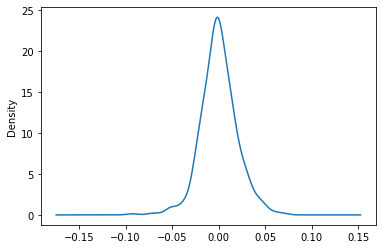

In [48]:
pct_returns_DEF['IOC.NS'].plot(kind='kde')

In [51]:
portfolio_def_weights = []
portfolio_def_returns = []
portfolio_def_risk = []
portfolio_def_sharpe_ratio = []

In [68]:
np.random.seed(2030)


for portfolio_def in tqdm(range(numPortfolios)):

  # Randomized weights for the portfolio
  weights_def = np.random.random_sample(len(stocks2))
  weights_def = weights_def/np.sum(weights_def)
  portfolio_def_weights.append(weights_def)
  print(weights_def)

  # Annual portfolio returns according to above weights
  annual_return_def = np.sum(pct_returns_DEF.mean() * weights_def) * 252
  portfolio_def_returns.append(annual_return_def)

  # Portfolio Risk Calculation
  cov_matrix = pct_returns_DEF.cov() * 252
  portfolio_def_variance = np.dot(weights_def.T, np.dot(cov_matrix,weights_def))
  portfolio_def_std_dev = np.sqrt(portfolio_def_variance)
  portfolio_def_risk.append(portfolio_def_std_dev)

  # Portfolio Sharpe Ratio Calculation
  sharpe_ratio_def = (annual_return_def - risk_free_return)/portfolio_def_std_dev
  portfolio_def_sharpe_ratio.append(sharpe_ratio_def)


[0.13483792 0.25193191 0.34786085 0.26536932]
[0.35192174 0.08331147 0.31419685 0.25056994]
[0.38133644 0.07004691 0.33160774 0.21700891]
[0.12414579 0.30505221 0.32663306 0.24416894]
[0.35464842 0.25909037 0.15051353 0.23574768]
[0.29301339 0.08472552 0.45517303 0.16708806]
[0.33474162 0.45196281 0.18333421 0.02996137]
[0.52397185 0.14404263 0.22602904 0.10595647]
[0.01320966 0.32953334 0.52726759 0.1299894 ]
[0.28859587 0.19956331 0.30878461 0.20305621]
[0.43740973 0.04813239 0.27569562 0.23876225]
[0.22112042 0.33096564 0.27752654 0.1703874 ]
[0.30088592 0.24148342 0.13099226 0.32663841]
[0.27962774 0.08809697 0.39810388 0.2341714 ]
[0.44740421 0.00461743 0.29356596 0.2544124 ]
[0.00818148 0.34316756 0.12211646 0.5265345 ]
[0.14003508 0.33009311 0.3107151  0.21915671]
[0.16680515 0.24578463 0.249389   0.33802122]
[0.10274811 0.33829963 0.20915245 0.34979981]
[0.41725125 0.23921773 0.24564836 0.09788266]
[0.44348791 0.19223198 0.11497998 0.24930013]
[0.29744089 0.07464804 0.27993619 

[0.31005373 0.31242483 0.37575599 0.00176546]
[0.44181241 0.13665268 0.2061376  0.21539731]
[0.33449435 0.36137717 0.21645421 0.08767426]
[0.30230274 0.31230578 0.14572404 0.23966745]
[0.12494068 0.44907775 0.02888373 0.39709784]
[0.1928697  0.35746777 0.30322818 0.14643436]
[0.20022764 0.32314376 0.46463517 0.01199342]
[0.36833727 0.08785875 0.30016467 0.24363932]
[0.24358545 0.28059173 0.29244252 0.1833803 ]
[0.45778554 0.0074542  0.51135978 0.02340048]
[0.38348924 0.25845419 0.24214799 0.11590857]
[0.03746512 0.16646993 0.34710048 0.44896446]
[0.36851111 0.27968863 0.03277252 0.31902774]
[0.18458501 0.41962797 0.31194606 0.08384096]
[0.15038436 0.36527244 0.34399897 0.14034423]
[0.14654479 0.33400444 0.07245893 0.44699184]
[0.06019536 0.46992099 0.1570199  0.31286375]
[0.2069325  0.04638523 0.38398454 0.36269774]
[0.02700312 0.12887823 0.31216371 0.53195494]
[0.09120764 0.10977866 0.50250872 0.29650498]
[0.3548495  0.0656068  0.42811586 0.15142784]
[0.24781949 0.38254186 0.11265912 

[0.22783309 0.28528646 0.18545328 0.30142718]
[0.36635984 0.02637421 0.36336954 0.2438964 ]
[0.06943457 0.12768352 0.05432272 0.74855919]
[0.27634646 0.26757492 0.15735169 0.29872694]
[0.5050548  0.25324417 0.10891924 0.1327818 ]
[0.24749697 0.33651701 0.19441012 0.2215759 ]
[0.22124554 0.15963167 0.29225576 0.32686702]
[0.0091376  0.30530692 0.16327916 0.52227632]
[0.50771598 0.17196557 0.26151379 0.05880465]
[0.01373483 0.41239436 0.43901596 0.13485485]
[0.199943   0.17534324 0.21169638 0.41301739]
[0.00038833 0.28325181 0.3538774  0.36248247]
[0.28305699 0.34770613 0.25380525 0.11543163]
[0.1411372  0.12764737 0.31757371 0.41364172]
[0.33149102 0.32605293 0.24672204 0.09573401]
[0.20698515 0.20349592 0.27056737 0.31895156]
[0.25876114 0.4768523  0.09524562 0.16914094]
[0.57844391 0.32277298 0.02274078 0.07604233]
[0.30040573 0.2462512  0.12151088 0.33183218]
[0.4210404  0.06260201 0.27634424 0.24001335]
[0.17707571 0.22729863 0.33557197 0.26005369]
[0.24074302 0.21497331 0.25106963 

[0.37353893 0.38219154 0.03913888 0.20513065]
[0.37860989 0.25289914 0.01899582 0.34949514]
[0.15850177 0.2036927  0.41219161 0.22561392]
[0.29209585 0.33986957 0.08296648 0.2850681 ]
[0.1106844  0.02978117 0.60817833 0.25135609]
[0.26710803 0.08450372 0.20480675 0.4435815 ]
[0.15534356 0.22164069 0.42578814 0.19722761]
[0.12187703 0.55318057 0.09677512 0.22816728]
[0.28524416 0.02025652 0.40989106 0.28460826]
[0.40077846 0.09792901 0.03046635 0.47082618]
[0.45852373 0.46508465 0.07373702 0.0026546 ]
[0.08497751 0.41539102 0.41329352 0.08633795]
[0.36609012 0.07059965 0.36098991 0.20232032]
[0.24114869 0.28081474 0.34614524 0.13189133]
[0.17204626 0.38138575 0.06308276 0.38348523]
[0.27380409 0.22071796 0.25123828 0.25423968]
[0.36210263 0.07845806 0.31866229 0.24077703]
[0.29001278 0.27784277 0.16231423 0.26983022]
[0.24054626 0.39191078 0.33528101 0.03226195]
[0.20100103 0.08389521 0.11637402 0.59872974]
[0.55600769 0.04663732 0.07511476 0.32224024]
[0.02959347 0.39969927 0.2589605  

[0.51627582 0.3908992  0.01470609 0.07811889]
[0.02338607 0.36869963 0.48996493 0.11794938]
[0.15429934 0.11543679 0.6300275  0.10023637]
[0.30331807 0.45270977 0.22299431 0.02097785]
[0.12712657 0.31861384 0.49751025 0.05674934]
[0.20127399 0.32903962 0.17724117 0.29244522]
[0.18871613 0.292952   0.18189221 0.33643966]
[0.22794519 0.01505758 0.32704176 0.42995546]
[0.10437157 0.3175947  0.38209994 0.19593379]
[0.12349837 0.4120321  0.37720056 0.08726897]
[0.19090216 0.53178388 0.10037458 0.17693939]
[0.28554512 0.18851592 0.23002234 0.29591662]
[0.1037278 0.0453064 0.4517138 0.399252 ]
[0.1978059  0.30057242 0.28040002 0.22122166]
[0.11636875 0.13315519 0.00309992 0.74737614]
[0.30360533 0.23916572 0.18077724 0.27645172]
[0.23337332 0.29595726 0.23548543 0.23518399]
[0.19953818 0.27657595 0.5212298  0.00265606]
[0.27352789 0.34940116 0.16443445 0.2126365 ]
[0.42543791 0.16132334 0.08205784 0.33118091]
[0.34623394 0.27211629 0.15579425 0.22585552]
[0.01746768 0.40511256 0.36153365 0.21

[0.31865852 0.30763827 0.11124241 0.26246079]
[0.33632841 0.28541888 0.09760339 0.28064931]
[0.31172145 0.12174653 0.25922563 0.30730639]
[0.06446111 0.32451067 0.19497359 0.41605463]
[0.19860906 0.22735401 0.2872007  0.28683623]
[0.12408826 0.33027633 0.23975605 0.30587936]
[0.25972373 0.07487287 0.30203006 0.36337335]
[0.22304095 0.05956388 0.36329859 0.35409658]
[0.34323659 0.12107548 0.397766   0.13792194]
[0.22468098 0.27711747 0.24446769 0.25373386]
[0.35681027 0.32130243 0.02903101 0.29285629]
[0.32848403 0.31772006 0.20401531 0.1497806 ]
[0.33769974 0.58251912 0.01855951 0.06122164]
[0.18738607 0.31758462 0.29187317 0.20315614]
[0.23400064 0.01770506 0.45988349 0.28841082]
[0.26710921 0.21819588 0.15838802 0.35630689]
[0.32736456 0.40832554 0.0055832  0.25872671]
[0.21479282 0.13783804 0.41959469 0.22777446]
[0.12493004 0.30322103 0.29874606 0.27310288]
[0.04825164 0.24725453 0.32639795 0.37809588]
[0.20888    0.04025648 0.4921615  0.25870202]
[0.35693895 0.13073039 0.05794108 

[0.34258293 0.01827297 0.37533729 0.26380681]
[0.22725063 0.39255437 0.18722266 0.19297234]
[0.37259278 0.49949911 0.0265608  0.10134731]
[0.21646259 0.40494193 0.11750274 0.26109274]
[0.26759685 0.02964989 0.28613821 0.41661505]
[0.3581954  0.00781025 0.35215072 0.28184364]
[0.23369314 0.23379342 0.29908344 0.23343001]
[0.39703491 0.11535083 0.01802516 0.4695891 ]
[0.11204297 0.04251616 0.49516669 0.35027418]
[0.06069151 0.37499161 0.28834383 0.27597305]
[0.16875368 0.05040655 0.41003236 0.37080742]
[0.27721648 0.42285417 0.06472044 0.23520891]
[0.51835358 0.23960093 0.05218346 0.18986203]
[0.10484968 0.32008164 0.30096063 0.27410804]
[0.03119497 0.07741737 0.39957297 0.49181469]
[0.26559518 0.1358153  0.08964483 0.50894469]
[0.12012269 0.25329832 0.3120494  0.31452959]
[0.38888525 0.33367563 0.05326025 0.22417887]
[0.0872279  0.36297355 0.19816445 0.35163411]
[0.16508463 0.30106277 0.05672483 0.47712777]
[0.22736127 0.09478143 0.26003411 0.41782319]
[0.07699206 0.13043624 0.33086328 

[0.1338633  0.32096491 0.3035673  0.24160449]
[0.09861595 0.31783037 0.27975893 0.30379475]
[0.29628021 0.22699881 0.24093856 0.23578243]
[0.2267246  0.49546708 0.24470222 0.03310611]
[0.12612222 0.24292105 0.30158815 0.32936858]
[0.16624006 0.22473715 0.27959615 0.32942664]
[0.25048894 0.38584811 0.07265256 0.29101039]
[0.03274146 0.34964428 0.16423777 0.4533765 ]
[0.17862141 0.31599686 0.31505003 0.1903317 ]
[0.27753898 0.2380351  0.15973582 0.3246901 ]
[0.06787802 0.37200285 0.31693843 0.24318069]
[0.73421268 0.01694609 0.23300179 0.01583945]
[0.50635704 0.07210214 0.19895217 0.22258865]
[0.20616399 0.08411809 0.45586727 0.25385065]
[0.33960411 0.13428058 0.16108676 0.36502854]
[0.26461121 0.27759273 0.28213867 0.17565738]
[0.02542422 0.46007289 0.3192041  0.19529879]
[0.06208962 0.35707837 0.43054795 0.15028406]
[0.35899146 0.10888409 0.06701143 0.46511303]
[0.17295181 0.41604162 0.40084043 0.01016614]
[0.04413705 0.27478051 0.23822278 0.44285966]
[0.30962705 0.30596485 0.01708884 

[0.30595138 0.1355102  0.27919391 0.27934451]
[0.42891062 0.21293567 0.29150313 0.06665057]
[0.54123255 0.23287538 0.03729183 0.18860024]
[0.19834873 0.35489625 0.30657551 0.14017951]
[0.32740789 0.28899724 0.06185758 0.32173729]
[0.08744204 0.32116828 0.29830786 0.29308182]
[0.1868434  0.37392572 0.063267   0.37596388]
[0.2553148  0.24668749 0.14576529 0.35223242]
[0.15484091 0.23877143 0.36380336 0.2425843 ]
[0.16687517 0.62570648 0.16562746 0.04179089]
[0.50680689 0.19525356 0.11992714 0.17801242]
[0.28529755 0.34669389 0.11740803 0.25060053]
[0.12300465 0.3845037  0.11476551 0.37772614]
[0.19267954 0.15893248 0.37412797 0.27426001]
[0.3017483  0.31964529 0.25449994 0.12410646]
[0.08894995 0.27338512 0.19407668 0.44358824]
[0.38613261 0.04827703 0.35251123 0.21307912]
[0.28354273 0.177371   0.29583531 0.24325096]
[0.0556694  0.06227993 0.40684037 0.4752103 ]
[0.17688494 0.12792377 0.00294948 0.69224181]
[0.19986289 0.31212654 0.05775214 0.43025842]
[0.37068776 0.1173593  0.49853958 

[0.35599313 0.1218244  0.464194   0.05798846]
[0.28990969 0.33887496 0.14819264 0.22302271]
[0.23567408 0.28581331 0.28406959 0.19444302]
[0.27628587 0.30323763 0.24394862 0.17652788]
[0.34559394 0.10217046 0.21749379 0.33474182]
[0.07060349 0.25714474 0.42304548 0.24920629]
[0.0349221  0.4535448  0.19625722 0.31527588]
[0.02367107 0.19615283 0.4525566  0.32761951]
[0.55801899 0.01076087 0.12808426 0.30313588]
[0.51603046 0.45366557 0.00975156 0.02055241]
[0.38633583 0.04285743 0.24733862 0.32346812]
[0.2220072  0.4609917  0.08421451 0.23278658]
[0.46536836 0.08194082 0.12178496 0.33090586]
[0.00783021 0.40970271 0.3707945  0.21167259]
[0.28904208 0.13237046 0.21864216 0.35994531]
[0.27639169 0.28619625 0.07963566 0.35777639]
[0.18497214 0.30973312 0.28925239 0.21604235]
[0.19970251 0.36410376 0.35667834 0.07951539]
[0.15362031 0.17433014 0.53965705 0.1323925 ]
[0.24815807 0.22754057 0.16469416 0.3596072 ]
[0.10877953 0.48679996 0.32231922 0.08210129]
[0.47353107 0.22950796 0.24856099 

[0.22758927 0.32352436 0.20260512 0.24628125]
[0.20112747 0.27745508 0.26103426 0.26038319]
[0.29326466 0.33916811 0.28647913 0.0810881 ]
[0.17659439 0.1986185  0.44444701 0.18034009]
[0.34369674 0.35318851 0.02222115 0.2808936 ]
[0.2662268  0.32783975 0.24883648 0.15709697]
[0.16135381 0.26235161 0.33631008 0.23998449]
[0.24509867 0.25700786 0.33381458 0.16407889]
[0.05732988 0.17962977 0.35330529 0.40973507]
[0.09166563 0.34747097 0.3238549  0.2370085 ]
[0.00777014 0.20911698 0.45161301 0.33149987]
[0.27547176 0.28827088 0.14003101 0.29622635]
[0.08788996 0.44230737 0.24224366 0.22755901]
[0.45271929 0.09769552 0.32392665 0.12565855]
[0.20471995 0.46718878 0.28877293 0.03931834]
[0.06705385 0.36063225 0.19695608 0.37535782]
[0.45186883 0.35442413 0.09667851 0.09702853]
[0.21955253 0.25605441 0.31407739 0.21031567]
[0.19243242 0.3742004  0.34711815 0.08624903]
[0.16950845 0.04766435 0.43577038 0.34705681]
[0.32774308 0.07523559 0.41213202 0.18488931]
[0.47299743 0.02490927 0.00159214 

[0.0697886  0.23826428 0.20329476 0.48865237]
[0.11947371 0.24262839 0.17611038 0.46178752]
[0.49911277 0.14752339 0.03563195 0.31773189]
[0.1550027  0.64955907 0.04771227 0.14772596]
[0.4155802  0.382422   0.17393653 0.02806127]
[0.27929454 0.01618346 0.329011   0.375511  ]
[0.31967205 0.2870371  0.22678161 0.16650924]
[0.62970316 0.16028352 0.20486677 0.00514655]
[0.03297186 0.20278943 0.57539686 0.18884185]
[0.37438479 0.17411349 0.09965555 0.35184617]
[0.33126136 0.16192313 0.26073361 0.24608189]
[0.42911242 0.2054978  0.32329223 0.04209755]
[0.376182   0.41378588 0.02414121 0.18589091]
[0.21865165 0.44049495 0.05560352 0.28524988]
[0.42763817 0.07775168 0.3371026  0.15750755]
[0.00409283 0.35794065 0.45920101 0.17876551]
[0.35075867 0.25016293 0.39234215 0.00673625]
[0.04532606 0.25419881 0.29267422 0.40780091]
[0.3795705  0.08529701 0.43538547 0.09974701]
[0.48158706 0.18522875 0.30402436 0.02915982]
[0.31755085 0.01946931 0.30110811 0.36187173]
[0.22559824 0.20360934 0.24605578 

[0.0897257  0.29776883 0.13505891 0.47744656]
[0.12244071 0.19133119 0.10876496 0.57746314]
[0.09175313 0.51247189 0.14326394 0.25251105]
[0.2927388 0.1174716 0.1948635 0.3949261]
[0.0660212  0.34856656 0.31283461 0.27257763]
[0.29357151 0.28890046 0.07339485 0.34413318]
[0.21708148 0.09441356 0.32103669 0.36746827]
[0.83956662 0.00450855 0.09350957 0.06241527]
[0.05243428 0.34135788 0.11564186 0.49056598]
[0.19705396 0.38540615 0.21832462 0.19921526]
[0.29246186 0.22906004 0.37598235 0.10249574]
[0.39582808 0.49224201 0.06939165 0.04253826]
[0.33732293 0.19696838 0.20466564 0.26104306]
[0.1577866  0.23237712 0.35106676 0.25876953]
[0.06513638 0.34395784 0.30863656 0.28226922]
[0.23344337 0.28182119 0.31086742 0.17386802]
[0.10011613 0.22152401 0.1136346  0.56472525]
[0.33718918 0.15132721 0.21262838 0.29885523]
[0.45983192 0.05499587 0.02087372 0.46429849]
[0.27681887 0.4465818  0.05593681 0.22066252]
[0.28772239 0.16509287 0.19724283 0.34994191]
[0.25824692 0.21032146 0.23944673 0.29

[0.36558642 0.31491347 0.27535513 0.04414498]
[0.03901288 0.20376444 0.40847664 0.34874603]
[0.05056089 0.54399583 0.07117041 0.33427286]
[0.23067998 0.26119393 0.376265   0.1318611 ]
[0.30963699 0.42734587 0.20158273 0.06143441]
[0.18553531 0.31529602 0.18799959 0.31116908]
[0.04372473 0.39154358 0.36782247 0.19690922]
[0.14570083 0.01999598 0.4033241  0.43097909]
[0.28211118 0.26445793 0.33644146 0.11698942]
[0.49995424 0.2575156  0.22316657 0.0193636 ]
[0.42536512 0.02187766 0.13703392 0.4157233 ]
[0.20514833 0.33596637 0.06871919 0.39016611]
[0.18715972 0.15628406 0.3798451  0.27671112]
[0.18052187 0.11867993 0.36847435 0.33232385]
[0.20882782 0.23280432 0.14964861 0.40871925]
[0.06915144 0.30031423 0.44080779 0.18972654]
[0.28011335 0.4415334  0.20244195 0.07591129]
[0.08382367 0.36284578 0.21216904 0.34116151]
[0.13293268 0.48594344 0.32877438 0.0523495 ]
[0.18096475 0.40545002 0.35352579 0.06005944]
[0.20181412 0.07484294 0.13634402 0.58699891]
[0.2370247  0.39636033 0.14615774 

[0.19819483 0.30030077 0.13921517 0.36228923]
[0.00615059 0.42370743 0.13325739 0.43688459]
[0.34880449 0.17038819 0.36978201 0.11102531]
[0.28587834 0.01932124 0.35754698 0.33725345]
[0.20668274 0.41841902 0.32116531 0.05373293]
[0.38292537 0.21787264 0.20304924 0.19615275]
[0.21266492 0.24470309 0.0619835  0.48064849]
[0.17496183 0.13445721 0.34482787 0.34575309]
[0.10630257 0.32728504 0.26460371 0.30180868]
[0.16594613 0.08196101 0.37508663 0.37700623]
[0.37864267 0.37070052 0.20581258 0.04484422]
[0.21428623 0.30652671 0.23924092 0.23994614]
[0.17702552 0.32248785 0.24100638 0.25948026]
[0.25177124 0.18991905 0.31250704 0.24580267]
[0.35578747 0.09612233 0.30578667 0.24230353]
[0.29793775 0.04885833 0.31179357 0.34141035]
[0.37372823 0.14550936 0.34688193 0.13388049]
[0.1649744  0.34153719 0.27521846 0.21826995]
[0.04661334 0.4027451  0.29918152 0.25146003]
[0.37419894 0.44436121 0.07778214 0.1036577 ]
[0.35607151 0.3942348  0.11458957 0.13510412]
[0.35088279 0.20588465 0.37055353 

[0.00138104 0.39725655 0.44491916 0.15644324]
[0.0135461  0.11873178 0.42107942 0.4466427 ]
[0.2844145  0.29225882 0.01853246 0.40479422]
[0.20746067 0.27210657 0.22477304 0.29565972]
[0.40538186 0.2788887  0.27921329 0.03651615]
[0.12531126 0.55291044 0.28233548 0.03944282]
[0.10264375 0.36892769 0.18756673 0.34086184]
[0.28726514 0.60082145 0.04363861 0.06827481]
[0.15367798 0.12638632 0.37087463 0.34906107]
[0.19890602 0.63635201 0.04120276 0.12353922]
[0.41069629 0.00112272 0.50402352 0.08415747]
[0.06966303 0.01238337 0.45333944 0.46461417]
[0.02721089 0.45059225 0.15621962 0.36597724]
[0.14519009 0.29151237 0.22897219 0.33432534]
[0.03566186 0.27781693 0.46667767 0.21984354]
[0.12812681 0.45176579 0.18543025 0.23467715]
[0.32228126 0.29134439 0.35954163 0.02683272]
[0.00104129 0.38211399 0.51001376 0.10683096]
[0.26957512 0.31482825 0.10535048 0.31024614]
[4.60291224e-01 3.40250281e-01 1.99343951e-01 1.14543790e-04]
[0.53206769 0.19551051 0.26284485 0.00957696]
[0.33847559 0.2020

[0.18154286 0.20248362 0.34634633 0.26962719]
[0.27572201 0.37718031 0.29508893 0.05200875]
[0.20226994 0.35123801 0.37365233 0.07283973]
[0.40982164 0.20147971 0.16225789 0.22644076]
[0.0699825 0.4204384 0.2580019 0.2515772]
[0.41989845 0.0031241  0.35382954 0.22314791]
[0.06531919 0.63978754 0.03054742 0.26434585]
[0.24967963 0.19487018 0.12505797 0.43039222]
[0.35339893 0.19420659 0.27574322 0.17665126]
[0.28541066 0.17382208 0.26370681 0.27706045]
[0.26113754 0.12483503 0.31618556 0.29784187]
[0.02193346 0.31274869 0.3361251  0.32919275]
[0.27802282 0.30293215 0.39477087 0.02427417]
[0.1610162  0.59271465 0.02380455 0.2224646 ]
[0.00464949 0.32626076 0.16327461 0.50581513]
[0.01758244 0.44254795 0.45598195 0.08388766]
[0.27173784 0.1039938  0.26104917 0.36321919]
[0.21298532 0.08745153 0.44055848 0.25900467]
[0.4022852  0.04168068 0.36940394 0.18663017]
[0.1907752  0.24994194 0.37315861 0.18612426]
[0.29092933 0.32476488 0.36991209 0.0143937 ]
[0.13772934 0.34655455 0.35885714 0.15

[0.13736288 0.29320274 0.41630913 0.15312524]
[0.36229206 0.1273411  0.02969721 0.48066963]
[0.16813121 0.05796146 0.34915273 0.42475459]
[0.32631521 0.35403084 0.30299596 0.016658  ]
[0.11816943 0.21045865 0.35022449 0.32114744]
[0.13244891 0.21855055 0.27825441 0.37074613]
[0.4305411  0.27775902 0.02423085 0.26746903]
[0.31114835 0.14384077 0.29223637 0.25277451]
[0.19515299 0.36783422 0.19609919 0.24091359]
[0.47090101 0.34332293 0.10904132 0.07673474]
[0.12595645 0.130315   0.40138924 0.34233932]
[0.24862076 0.18094644 0.2299632  0.34046961]
[0.32702294 0.30384337 0.02523446 0.34389924]
[0.19844734 0.28544335 0.23632202 0.2797873 ]
[0.09182304 0.26316358 0.29278768 0.3522257 ]
[0.31670409 0.02663846 0.33979593 0.31686152]
[0.21152431 0.29485124 0.25378096 0.23984349]
[0.13089361 0.35808621 0.26447324 0.24654694]
[0.16004788 0.24147405 0.38167489 0.21680318]
[0.22806053 0.25980288 0.30168388 0.21045271]
[0.28147547 0.15520575 0.2602436  0.30307518]
[0.39082803 0.34310711 0.21586367 

[0.62225195 0.2227761  0.10624245 0.04872951]
[0.25172835 0.54982637 0.07536298 0.12308229]
[0.24747098 0.31266613 0.22149751 0.21836538]
[0.35984638 0.19271498 0.17082293 0.27661571]
[0.22257872 0.17496164 0.342331   0.26012864]
[0.36143014 0.39496228 0.14694881 0.09665878]
[0.03724642 0.30647369 0.32957171 0.32670818]
[0.42801195 0.15731124 0.05484791 0.3598289 ]
[0.0813644  0.33655819 0.18180313 0.40027428]
[0.10892515 0.25792539 0.26169841 0.37145104]
[0.40475126 0.34225914 0.19145613 0.06153347]
[0.3418754  0.12529469 0.35217196 0.18065795]
[0.11497656 0.33043473 0.31810872 0.23647998]
[0.31683399 0.18955023 0.00723847 0.48637731]
[0.32611766 0.42327415 0.03562446 0.21498373]
[0.18059185 0.4603089  0.20421415 0.1548851 ]
[0.3647987  0.32166925 0.2077782  0.10575385]
[0.34050803 0.31801438 0.32099769 0.0204799 ]
[0.14122789 0.36615185 0.27547026 0.21715   ]
[0.30274924 0.29954457 0.31653536 0.08117083]
[0.1675888  0.24034092 0.24812427 0.34394602]
[0.22850887 0.27159096 0.3591476  

[0.10127105 0.34354211 0.24782963 0.30735721]
[0.35511806 0.46361653 0.10292037 0.07834504]
[0.10785266 0.48743663 0.35090159 0.05380912]
[0.20165795 0.31748674 0.1787435  0.30211181]
[0.21422491 0.28203121 0.15386303 0.34988085]
[0.22710326 0.11955264 0.25125515 0.40208894]
[0.14506127 0.16357663 0.31177289 0.3795892 ]
[0.29553698 0.13569434 0.3031467  0.26562198]
[0.10707334 0.40335555 0.08656881 0.4030023 ]
[0.2275097  0.31190718 0.21288101 0.2477021 ]
[0.00797846 0.35437428 0.36962883 0.26801843]
[0.25524147 0.08843207 0.12286278 0.53346368]
[0.26160855 0.02965645 0.67602199 0.03271301]
[0.27793435 0.36309373 0.14926574 0.20970618]
[0.44865345 0.2518468  0.0175981  0.28190166]
[0.00099441 0.42548659 0.36179086 0.21172815]
[0.61384072 0.21955308 0.09698024 0.06962596]
[0.1057593  0.34471026 0.28690058 0.26262986]
[0.00696741 0.48222647 0.37792117 0.13288494]
[0.56222751 0.21289932 0.14063708 0.0842361 ]
[0.19760089 0.2594657  0.19406186 0.34887155]
[0.18839031 0.24495766 0.4123713  

[0.08315214 0.43953411 0.05567902 0.42163473]
[0.29277351 0.20750829 0.31300475 0.18671345]
[0.23442752 0.1732545  0.39276861 0.19954938]
[0.27300639 0.33791862 0.35777196 0.03130303]
[0.2776643  0.44188856 0.27310516 0.00734198]
[0.3635876  0.01273351 0.04390401 0.57977488]
[0.22862441 0.22575646 0.19847832 0.34714081]
[0.35519675 0.27731121 0.08605696 0.28143508]
[0.37674028 0.03409445 0.26100526 0.32816002]
[0.17224621 0.39895718 0.11875984 0.31003678]
[0.37557479 0.36687684 0.2122601  0.04528827]
[0.18263297 0.40338727 0.34295584 0.07102392]
[0.22448257 0.16271958 0.37832535 0.23447249]
[0.22485677 0.36776409 0.30440216 0.10297699]
[0.1442555  0.61445179 0.18195272 0.05934   ]
[0.10130078 0.49093739 0.09490953 0.31285231]
[0.08275582 0.34960562 0.32863922 0.23899934]
[0.11666805 0.28533817 0.26087217 0.33712161]
[0.75805746 0.01807688 0.17590126 0.04796439]
[0.2387952  0.47724978 0.27833066 0.00562436]
[0.01685012 0.27780407 0.24723865 0.45810716]
[0.42228129 0.25712187 0.10090389 

[0.5200123  0.16719483 0.24249744 0.07029542]
[0.36977973 0.15973368 0.35088154 0.11960504]
[0.36119761 0.4718753  0.06628001 0.10064708]
[0.49515412 0.14546817 0.28409391 0.0752838 ]
[0.02129443 0.15923911 0.19422059 0.62524586]
[0.3614786  0.29279807 0.03681216 0.30891117]
[0.42793383 0.22417505 0.13186785 0.21602328]
[0.15066893 0.25509915 0.12627621 0.46795571]
[0.09960826 0.50978242 0.03883134 0.35177797]
[0.31302644 0.13230492 0.26065141 0.29401724]
[0.50176481 0.14623232 0.02841164 0.32359123]
[0.26068462 0.30310792 0.15148579 0.28472166]
[0.13391451 0.05680048 0.40724869 0.40203632]
[0.63284543 0.03678454 0.13731187 0.19305815]
[0.25982448 0.10048737 0.5319467  0.10774144]
[0.09371631 0.15812152 0.15220063 0.59596153]
[0.18271615 0.18648804 0.04868456 0.58211125]
[0.30033008 0.0808532  0.25236417 0.36645255]
[0.60568991 0.00993668 0.12409371 0.26027971]
[0.45747202 0.13002021 0.28212031 0.13038747]
[0.34939426 0.22399187 0.33499879 0.09161507]
[0.33711014 0.21017407 0.32528942 

[0.32904818 0.13906762 0.21252629 0.31935792]
[0.30956059 0.2593683  0.1493536  0.2817175 ]
[0.37272288 0.14888127 0.00168729 0.47670857]
[0.17869702 0.22882971 0.21182879 0.38064448]
[0.56302078 0.00621036 0.18381842 0.24695044]
[0.39867986 0.07064094 0.40610139 0.12457782]
[0.45933448 0.30735248 0.10107157 0.13224147]
[0.06736773 0.42834    0.48376631 0.02052597]
[0.03126997 0.47031855 0.21496504 0.28344644]
[0.19058827 0.28571095 0.2347004  0.28900037]
[0.06397968 0.40245542 0.47773686 0.05582803]
[0.29659732 0.12508463 0.30410812 0.27420993]
[0.58770489 0.13165041 0.15355825 0.12708644]
[0.08511773 0.31550911 0.48699633 0.11237683]
[0.22629451 0.03303553 0.4435838  0.29708615]
[0.23761789 0.36474937 0.04713523 0.35049752]
[0.45754291 0.07159209 0.24590463 0.22496038]
[0.24127998 0.22618139 0.52818902 0.0043496 ]
[0.57123114 0.26996635 0.06942989 0.08937262]
[0.28119234 0.24407757 0.10007719 0.3746529 ]
[0.31434535 0.40263037 0.22436351 0.05866077]
[0.01876517 0.48969968 0.35509211 

[4.35335688e-04 8.07953127e-02 6.50729607e-01 2.68039744e-01]
[0.36437505 0.02227075 0.51396965 0.09938456]
[0.22332549 0.48735256 0.10472527 0.18459668]
[0.08984522 0.39416685 0.17288619 0.34310173]
[0.53404749 0.27711976 0.14655391 0.04227884]
[0.00956578 0.49159894 0.07639924 0.42243604]
[2.67215579e-01 2.50363012e-01 1.18670174e-04 4.82302739e-01]
[0.21679695 0.21632538 0.20792785 0.35894982]
[0.18790908 0.08664524 0.33992806 0.38551763]
[0.1879201  0.37571824 0.30048715 0.1358745 ]
[0.30553481 0.29517304 0.29276412 0.10652804]
[0.30097587 0.1980278  0.33278345 0.16821288]
[0.21484394 0.30081142 0.19586708 0.28847756]
[0.35358417 0.28754183 0.08386947 0.27500452]
[0.50398108 0.06618968 0.38248301 0.04734623]
[0.31112713 0.33659453 0.29781825 0.05446009]
[0.13119024 0.52395662 0.18580408 0.15904906]
[0.57299294 0.03318104 0.06691665 0.32690937]
[0.14193452 0.25226468 0.14656407 0.45923673]
[0.43857967 0.19978885 0.01472193 0.34690956]
[0.18034194 0.40494334 0.27696272 0.137752  ]
[0

[0.11006282 0.11361191 0.32343558 0.45288969]
[0.21189491 0.41425046 0.10298489 0.27086975]
[0.16060916 0.44152798 0.22342543 0.17443742]
[0.04572749 0.34678473 0.29242721 0.31506057]
[0.1957939  0.33550584 0.21271803 0.25598223]
[0.27167118 0.34244242 0.30241723 0.08346917]
[0.35351478 0.14031444 0.30653604 0.19963473]
[0.23400218 0.20847242 0.29803063 0.25949477]
[0.25963186 0.03224206 0.38078241 0.32734367]
[0.3346628  0.55078126 0.05548165 0.05907429]
[0.30720083 0.20022214 0.26352616 0.22905087]
[0.42894385 0.39421016 0.14825552 0.02859048]
[0.09806011 0.406009   0.22906745 0.26686343]
[0.07826627 0.43027986 0.43899667 0.05245721]
[0.18440541 0.30871528 0.28145952 0.22541979]
[0.43242735 0.06599265 0.1885018  0.3130782 ]
[0.05407991 0.41307833 0.34157725 0.19126451]
[0.20117863 0.37972071 0.01592253 0.40317813]
[0.23992468 0.23915671 0.19645273 0.32446588]
[0.49507874 0.14267488 0.26608027 0.09616611]
[0.03626627 0.05522295 0.19736958 0.7111412 ]
[0.07044715 0.34605162 0.32027901 

In [69]:
metrics_def = [portfolio_def_returns,portfolio_def_risk,portfolio_def_sharpe_ratio,portfolio_def_weights]
portfolio_def_df = pd.DataFrame(metrics_def).T

portfolio_def_df.columns = ['Return','Risk','Sharpe Ratio','Associated Weights']
portfolio_def_df

,Return,Risk,Sharpe Ratio,Associated Weights
0,0.123695,0.197963,0.313672,"[0.4340371095672847, 0.29918315980518256, 0.24..."
1,0.205385,0.224853,0.639465,"[0.017488866516191498, 0.320719742573904, 0.29..."
2,0.210058,0.219853,0.67526,"[0.06159870528823687, 0.2897397876617426, 0.27..."
3,0.248307,0.243987,0.765234,"[0.05165346147267082, 0.3598334307876269, 0.07..."
4,0.181832,0.208969,0.575359,"[0.13132795331377844, 0.253112329127567, 0.346..."
...,...,...,...,...
14995,0.18461,0.199711,0.615942,"[0.31191818563393203, 0.12941162751537377, 0.3..."
14996,0.152571,0.202688,0.448825,"[0.22889152366325613, 0.39229446380187966, 0.2..."
14997,0.110967,0.215012,0.229599,"[0.15249431143159564, 0.46702187717046945, 0.3..."
14998,0.174666,0.198781,0.568795,"[0.27205644942464463, 0.1854991305213459, 0.32..."


In [70]:
min_risk_portfolio = portfolio_def_df.iloc[portfolio_def_df.Risk.astype('float64').argmin()].to_frame().T
min_risk_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
12761,0.153496,0.194603,0.472221,"[0.3769235623609967, 0.24069775643347224, 0.24..."


In [71]:
print('For a minimal Risk Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks2,min_risk_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a minimal Risk Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

HINDUNILVR.NS  -------------  37.69235623609967

SUNPHARMA.NS  -------------  24.069775643347224

RAJESHEXPO.NS  -------------  24.98564008578277

IOC.NS  -------------  13.252228034770342


In [72]:
max_return_portfolio = portfolio_def_df.iloc[portfolio_def_df.Return.astype('float64').argmax()].to_frame().T
max_return_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
2934,0.376029,0.309935,1.0145,"[0.06877054472233547, 0.005776480977767202, 0...."


In [73]:
print('For a maximal Return Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks2,max_return_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Return Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

HINDUNILVR.NS  -------------  6.877054472233548

SUNPHARMA.NS  -------------  0.5776480977767202

RAJESHEXPO.NS  -------------  0.051344848324506226

IOC.NS  -------------  92.49395258166523


In [74]:
max_sharpeRatio_portfolio = portfolio_def_df.iloc[portfolio_def_df['Sharpe Ratio'].astype('float64').argmax()].to_frame().T
max_sharpeRatio_portfolio

,Return,Risk,Sharpe Ratio,Associated Weights
2934,0.376029,0.309935,1.0145,"[0.06877054472233547, 0.005776480977767202, 0...."


In [75]:
print('For a maximal Sharpe Ratio Portfolio')
print()
print('STOCK SYMBOL' + '    '   + 'Allocation Percentage')
print('--------------------------')
for stock,per_alloc in zip(stocks2,max_sharpeRatio_portfolio['Associated Weights'].values[0]):
  print()
  print(stock + '  -------------  ' + str(per_alloc * 100))

For a maximal Sharpe Ratio Portfolio

STOCK SYMBOL    Allocation Percentage
--------------------------

HINDUNILVR.NS  -------------  6.877054472233548

SUNPHARMA.NS  -------------  0.5776480977767202

RAJESHEXPO.NS  -------------  0.051344848324506226

IOC.NS  -------------  92.49395258166523
